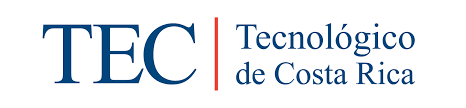

# **Maestría en Electrónica - Procesamiento Digital de Señales.**  
## **Curso:** *Reconocimiento de Patrones* <br> **Investigación Corta #3:** *Aprendizaje No Supervisado.*
### *Carlos Brenes Jimenez. (Id: 9002170)*

#### " La mayor parte del aprendizaje humano y animal es no supervisado. Si la inteligencia fuera un pastel, el aprendizaje supervisado sería el lustre en el pastel, y el aprendizaje re-enforzado sería la cereza en el pastel. Nosotros sabemos como hacer el lustre y la cereza, pero no sabemos cómo hacer el pastel. Nosotros necesitamos resolver el problema de aprendizaje no supervisado antes de que podamos pensar alcanzar la verdadera AI "  ***--Yan LeCun***

#### ***Definiciones:*** <br> <br>.- ***Machine learning(Aprendizaje de Máquina o ML)*** es un subcampo de la Inteligencia Artificial (AI) en el cual las computadoras aprenden de los datos para usualmente mejorar su desempeño en una tarea específica sin explícitamente ser programadas. <br> <br> .-***Aprendizaje No Supervisado*** es una rama de ***ML*** que se usa para identificar patrones ocultos y aprender la estructura inherente de datos no etiquetados.

#### .- El ***AI*** se entrena con el set de datos de entrenamiento (experiencia) para mejorar su tasa de error (desempeño) en señalar una tarea, y el criterio de éxito final es qué tan bien su experiencia generaliza a todos los datos nuevos no antes vistos (error de generalización).

#### .- En el Aprendizaje No Supervisado, las etiquetas no están disponibles. Por lo tanto, la tarea del agente de **AI** no está bien definida, y el desempeño no puede ser medido claramente.

#### .- El Sistema No Supervisado es mejor que el Sistema Supervisado en encontrar nuevos patrones en datos futuros, haciendo que la solución No Supervisada sea más sencilla.

#### .- El Aprendizaje No Supervisado se realiza al aprender la estructura subyacente de los datos en los cuales se entrena. Esto lo hace al tratar de representar los datos de su entrenamiento con un conjunto de parámetros que es significativamente más pequeño que el número de muestras disponibles en el conjunto de datos. 

#### ***Conjunto de datos:*** 
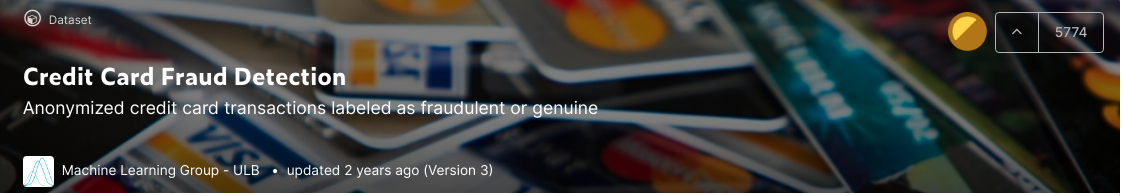
Fuente: https://www.kaggle.com/mlg-ulb/creditcardfraud
<br>
#### Transacciones anónimas de tarjetas de créditos en Europa (Sep. 2013). <br> .- Las transacciones son etiquetadas como fraudulentas o genuinas. <br> .- El objectivo es construir una solución de aprendizaje de máquina que pueda predecir las transacciones en datos nunca antes vistos. <br> .- Los datos están imbalanceados. <br> .- El total de las transacciones es de 284,807 y solamente 492 son fraudulentas (~0.17%). <br> .- Hay un total de 28 características, todas son númericas (no hay variables categóricas). <br> .- Hay 3 variables adicionales: La hora de la transacción, el monto de la transacción y la clase de la transacción (1 es fraude y 0 es genuina).

#### ***Bibliotecas de Redes Neuronales:*** - Importar: <br> 5. TensorFlow. <br> 6. Keras. <br> <br> **TensorFlow** es un proyecto de código abierto de Google y no es parte de la distribución de Conda. <br> <br> Keras es biblioteca de red neurona; de código abierto. Es un API de alto nivel para usar con las funciones de bajo nivel en TensorFlow.
```$ pip install tensorflow``` <br>
```$ pip install keras```

#### Instalar la versión de `Gradient Boosting" conocida como XGBoost


#### Instalar dos versiones de `Gradient Boosting": <br> <br> 1. XGBoost <br> 2. LightGBM
```$ conda install -c conda-forge xgboost``` <br>
```$ conda install -c conda-forge lightgbm```

#### Instalar Algoritmos de Agrupamiento "Clustering" : <br> <br> 1. fastcluster <br> 2. hdbscan
```$ conda install -c conda-forge fastcluster``` <br>
```$ conda install -c conda-forge hdbscan```

#### Instalar Algoritmo para series de tiempo : <br> <br> 1. tslearn
```$ conda install -c conda-forge tslearn``` <br>


#### ***Bibliotecas Estándard:*** <br> <br>.- Importar: <br> 1. numpy. <br> 2. pandas. <br> 3. seaborn. <br> 4. matplotlib. <br>

In [64]:
import numpy as np
import pandas as pd
import os

'''Data Visualization'''
import matplotlib.pyplot as plt
import seaborn as sns
# This function provides an interface to the possible ways you can generate colors in seaborn, and it’s used internally 
# by any function that has a palette argument (and in some cases for a color argument when multiple colors are needed.
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline


#### ***Pre-procesamiento de los datos***

In [65]:
# The sklearn.preprocessing package provides several common utility functions and transformer classes to change 
# raw feature vectors into a representation that is more suitable for the downstream estimators.
from sklearn import preprocessing as pp 
from scipy.stats import pearsonr 
from sklearn.model_selection import train_test_split

# Stratified K-Folds cross-validator. The folds are made by preserving the percentage of samples for each class.
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import log_loss 
from sklearn.metrics import precision_recall_curve, average_precision_score 
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report 

#### ***Algoritmos***

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#### ***Preparación de los datos***

In [67]:
# Acquire Data
current_path = os.getcwd()
#current_path

In [68]:
file = os.path.sep.join(['', 'datasets', 'credit_card_data', 'creditcard.csv'])
#file

In [69]:
data = pd.read_csv(current_path + file)

#### ***Análisis Exploratorio de los datos***

#### Forma de la Matriz del Conjunto de Datos

In [70]:
data.shape

(284807, 31)

#### Observar las primeras filas del conjunto de datos

In [71]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Obtener las Estadísticas Descriptivas del Conjunto de datos

In [72]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Obtener las etiquetas de las columnas del conjunto de datos.

In [73]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

#### Obtener el número de transacciones fraudulentas.

In [74]:
print("Cantidad de transacciones fraudulentas ---> ", data['Class'].sum())

Cantidad de transacciones fraudulentas --->  492


#### Contar la cantidad de datos tipo NaN.

In [75]:
nanCounter = np.isnan(data).sum()
nanCounter

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### Contar los datos distintos en el conjunto de datos. <br> Se tienen 124,592 datos de la hora de transacción. Pero se sabe que hay 284,807 observaciones en total. Esto quiere decir que hay varias transacciones en algunas horas en particular. <br> Y se confirma que hay dos clases. 1:Fraude y 0:Genuino.

In [76]:
distinctCounter = data.apply(lambda x: len(x.unique()))
distinctCounter

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

#### Generar la matriz de características "X" y el Vector de Clases "Y". <br> Se crean y se estandarizan la matriz de características "X" y se aislan las etiquetas del vector "Y" (1=Fraude, 0=No hay fraude).

In [77]:
dataX = data.copy().drop(['Class'],axis=1)
dataY = data['Class'].copy()

In [78]:
featuresToScale = dataX.drop(['Time'],axis=1).columns
featuresToScale

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

#### **Función de Escalamiento.** <br> <br> Escalamiento de características. Se elimna la columna de la hora de transacción. <br> Se re-escala la matriz de características de tal forma que cada muestra (excepto para la hora), tiene una media de cero y una desviación estándard de uno

In [79]:
# The preprocessing module further provides a utility class StandardScaler 
# that implements the Transformer API to compute the mean and standard deviation on a training 
# set so as to be able to later reapply the same transformation on the testing set. 
sX = pp.StandardScaler(copy=True)

In [80]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
dataX.loc[:,featuresToScale] = sX.fit_transform(dataX[featuresToScale])
#dataX.loc[:,featuresToScale]

#### Obtener las estadísticas descriptivas.

In [81]:
dataX.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,94813.859575,-8.881566e-18,-1.277349e-17,-4.790058e-17,-1.955940e-17,3.832046e-17,9.979288e-18,1.476935e-17,3.293165e-18,9.979288e-20,...,-7.035398e-18,-4.989644e-19,2.794201e-18,9.380530e-18,1.117680e-17,-5.109395e-17,7.946008e-18,1.234937e-18,-6.336848e-18,2.913952e-17
std,47488.145955,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,0.000000,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,...,-7.069146e+01,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-3.532294e-01
25%,54201.500000,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,...,-2.746334e-01,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-3.308401e-01
50%,84692.000000,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,...,-8.104705e-02,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,-2.652715e-01
75%,139320.500000,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,...,1.725733e-01,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,-4.471707e-02
max,172792.000000,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,...,5.113464e+01,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,1.023622e+02


#### Generar la matriz de correlación.

In [82]:
correlationMatrix = pd.DataFrame(data=[],index=dataX.columns,columns=dataX.columns)
for i in dataX.columns:
    for j in dataX.columns:
        correlationMatrix.loc[i,j] = np.round(pearsonr(dataX.loc[:,i],dataX.loc[:,j])[0],2)

#### Se guarda la matrix de correlación en un archivo.

In [83]:
correlation_file = os.path.sep.join(['', 'datasets', 'credit_card_data', 'correlationMatrix.csv'])
correlationMatrix.to_csv(current_path+correlation_file)

#### Cuantificar la frecuencia de cada clase. Se confirma el desbalance entre las clases del conjunto de datos.

Text(0, 0.5, '% de la Frecuencia')

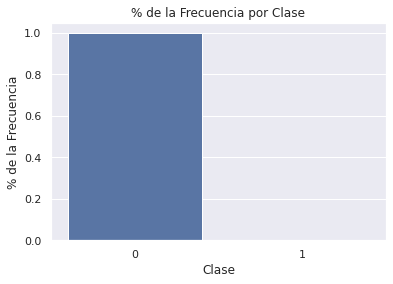

In [84]:
count_classes = pd.value_counts(data['Class'],sort=True).sort_index()
ax = sns.barplot(x=count_classes.index, y=tuple(count_classes/len(data)))
ax.set_title('% de la Frecuencia por Clase')
ax.set_xlabel('Clase')
ax.set_ylabel('% de la Frecuencia')

#### ***Conceptos importantes de Aprendizaje No Supervisado.*** <br> <br> 1. Reducción de dimensiones. <br> 2. Agrupamiento.

#### ***Algoritmos de Reducción de Dimensiones:*** <br> <br>Proyectan datos de varias dimensiones a un espacio dimensional menor, manteniendo la información relevante tanto sea posible y remueve información redundante. Una vez que los datos están en un espacio dimensional menor, los algoritmos de aprendizaje de máquina son capaces de identificar patrones interesantes.

#### ***Aplicaciones:*** <br> <br> 1. Detección de Anomalías: se usa para descubrir eficientemente eventos raros como: Fraude, Ataques de ciberseguridad, Terrorismo, Tráfico de personas, armas y drogas, Transacciones ilegales de acciones, <br> Propagación de Enfermedades y Fallas de mantenimiento en equipos críticos. <br> <br> <br> 2. Segmentación de Grupo: permite comprender el comportamiento de personas en areas como el mercadeo, compras por internet, escucha de música, videos, citas en línea y actividades de medios sociales

#### Se importan las bibliotecas.

In [85]:
'''Principal'''
import numpy as np
import pandas as pd
import os, time, pickle, gzip

'''Preprocesamiento de los datos y evaluacion del modelo'''
from sklearn import preprocessing as pp

'''Visualizacion de los datos'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

#### ***Cargar el conjunto de datos***

In [86]:
current_path = os.getcwd()
file = os.path.sep.join(['', 'datasets', 'mnist_data', 'mnist.pkl.gz'])

f = gzip.open(current_path+file, 'rb')
train_set, validation_set, test_set = pickle.load(f, encoding='latin1')
f.close()

X_train, y_train = train_set[0], train_set[1]
X_validation, y_validation = validation_set[0], validation_set[1]
X_test, y_test = test_set[0], test_set[1]

#### ***Confirmar dimensiones de los conjuntos de datos***

In [87]:
# Verify shape of datasets
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_validation: ", X_validation.shape)
print("Shape of y_validation: ", y_validation.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (50000, 784)
Shape of y_train:  (50000,)
Shape of X_validation:  (10000, 784)
Shape of y_validation:  (10000,)
Shape of X_test:  (10000, 784)
Shape of y_test:  (10000,)


#### ***Creación de los "Dataframes" por medio de pandas.***

In [88]:
train_index = range(0,len(X_train))
validation_index = range(len(X_train), \
                         len(X_train)+len(X_validation))
test_index = range(len(X_train)+len(X_validation), \
                   len(X_train)+len(X_validation)+len(X_test))

X_train = pd.DataFrame(data=X_train,index=train_index)
y_train = pd.Series(data=y_train,index=train_index)

X_validation = pd.DataFrame(data=X_validation,index=validation_index)
y_validation = pd.Series(data=y_validation,index=validation_index)

X_test = pd.DataFrame(data=X_test,index=test_index)
y_test = pd.Series(data=y_test,index=test_index)

#### ***Estadísticas descriptivas de la matriz de entrenamiento.***

In [89]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,50000.0,50000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000739,0.000354,0.000204,0.000090,0.000071,0.000009,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022784,0.015424,0.012080,0.007218,0.007181,0.001483,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.992188,0.992188,0.988281,0.988281,0.992188,0.242188,0.0,0.0,0.0,0.0


#### ***Mostrar los valores del vector "Y"***

In [90]:
y_train.head()

0    5
1    0
2    4
3    1
4    9
dtype: int64

### Definir función para mostrar las imágenes y sus etiquetas

In [91]:
def view_digit(example):
    label = y_train.loc[example]
    image = X_train.loc[example,:].values.reshape([28,28])
    plt.title('Example: %d  Label: %d' % (example, label))
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.show()

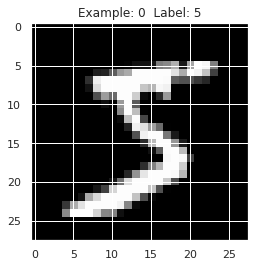

In [92]:
# Primer digito.
view_digit(0)

#### Se crean los vectores one-hot para las etiquetas.

In [93]:
def one_hot(series):
    label_binarizer = pp.LabelBinarizer()
    label_binarizer.fit(range(max(series)+1))
    return label_binarizer.transform(series)

In [94]:
def reverse_one_hot(originalSeries, newSeries):
    label_binarizer = pp.LabelBinarizer()
    label_binarizer.fit(range(max(originalSeries)+1))
    return label_binarizer.inverse_transform(newSeries)

In [95]:
# Create one-hot vectors for the labels
y_train_oneHot = one_hot(y_train)
y_validation_oneHot = one_hot(y_validation)
y_test_oneHot = one_hot(y_test)

#### Vector One-hot para ejemplo 0, que representa el número 5. 

In [96]:
y_train_oneHot[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

#### ***Algoritmos de Reducción de dimensiones*** <br> <br> 1. Proyección Lineal (datos son proyectados de un espacio dimensional grande a un espacio menor).<br> 1.1. Análisis de Componente Principal (PCA). <br> 1.2. Descomposición en Valores Singulares (SVD). <br> 1.3. Proyección Aleatoria.  

#### 1.1. Análisis de Componente Principal (PCA). <br> <br> .- Se enfoca en identificar cuáles características del conjunto de datos son más importantes en explicar variabilidad (permitiendo así que el modelo pueda separar los datos posteriormente). <br><br> .- Es claro que se perderá una parte de la variación al moverse a un espacio dimensional menor, pero la estructura subyacente de los datos será fácil de identificar, permitiendo así hacer tareas como el agrupamiento "Clustering" más eficiente. <br><br> .- Algunos ejemplos de algoritmos de esta familia son: PCA Incremental y variantes no lineales como es el "Kernel" PCA y variantes dispersas como lo es el "Sparse" PCA.

In [97]:
# Principal Component Analysis
from sklearn.decomposition import PCA

n_components = 784
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=train_index)

#### Porcentaje de varianza capturada por los 784 componentes principales.

In [98]:
print("Varianza explicada por todos los 784 componentes principales: ", \
      sum(pca.explained_variance_ratio_))

Varianza explicada por todos los 784 componentes principales:  0.9999999688752202


#### Porcentaje de varianza capturada por los componentes principales "X"

In [99]:
importanceOfPrincipalComponents = \
    pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

print('Variance Captured by First 10 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:9].sum(axis=1).values)
print('Variance Captured by First 20 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:19].sum(axis=1).values)
print('Variance Captured by First 50 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:49].sum(axis=1).values)
print('Variance Captured by First 100 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:99].sum(axis=1).values)
print('Variance Captured by First 200 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:199].sum(axis=1).values)
print('Variance Captured by First 300 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:299].sum(axis=1).values)

Variance Captured by First 10 Principal Components:  [0.4887617]
Variance Captured by First 20 Principal Components:  [0.64397967]
Variance Captured by First 50 Principal Components:  [0.82486063]
Variance Captured by First 100 Principal Components:  [0.91465837]
Variance Captured by First 200 Principal Components:  [0.9665007]
Variance Captured by First 300 Principal Components:  [0.9862489]


#### Importancia de cada componente principal.

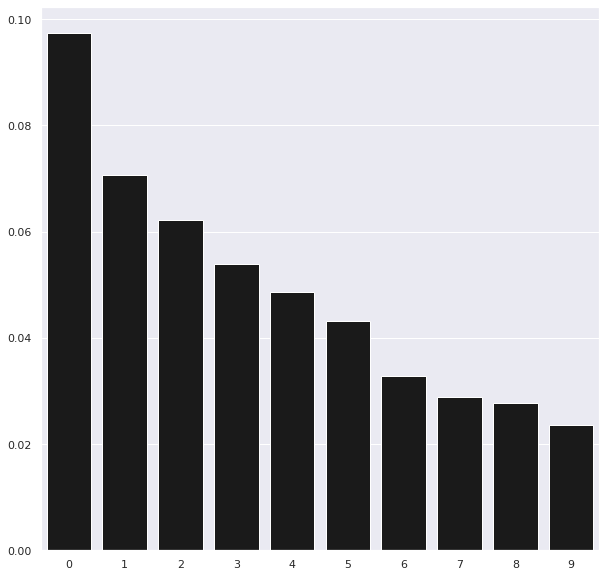

In [100]:
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(data=importanceOfPrincipalComponents.loc[:,0:9],color='k')

#### Se grafica las dos mayores componentes principales. Se observa que PCA logra separar los puntos en el espacio. Esto se logra sin usar etiqueta alguna (Aprendizaje No Supervisado).

In [101]:
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separación de Observaciones usando "+algoName)

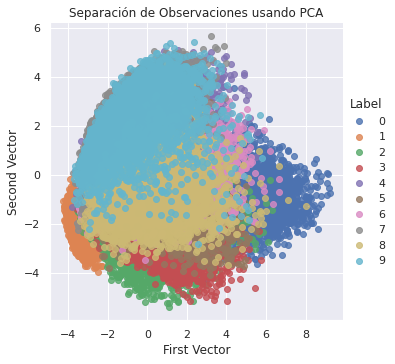

In [102]:
scatterPlot(X_train_PCA, y_train, "PCA")

#### Si se grafica con las dos características más importantes del conjunto de 784 características (determinado por el entrenamiento del Modelo supervisado) es claro que la separación es pobre.

Text(0.5, 1.0, 'Separation of Observations Using Original Feature Set')

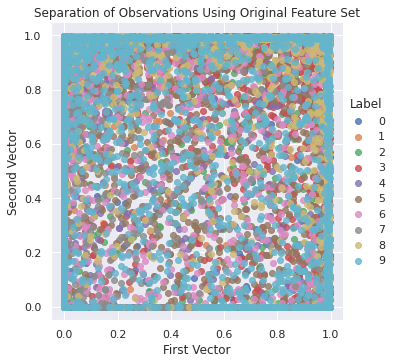

In [103]:
X_train_scatter = pd.DataFrame(data=X_train.loc[:,[350,406]], index=X_train.index)
X_train_scatter = pd.concat((X_train_scatter,y_train), axis=1, join="inner")
X_train_scatter.columns = ["First Vector", "Second Vector", "Label"]
sns.lmplot(x="First Vector", y="Second Vector", hue="Label", data=X_train_scatter, fit_reg=False)
ax = plt.gca()
ax.set_title("Separation of Observations Using Original Feature Set")

#### PCA Incremental: <br> <br> Para conjuntos de datos muy grandes con recursos de memoria limitados, se puede hacer un PCA incremental en pequenos grupos ("batches") para aprovechar la memoria disponible.

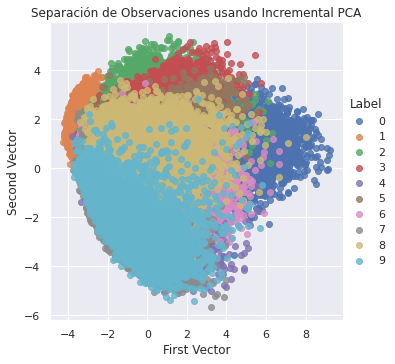

In [104]:
# Incremental PCA
from sklearn.decomposition import IncrementalPCA

n_components = 784
batch_size = None

incrementalPCA = IncrementalPCA(n_components=n_components, \
                                batch_size=batch_size)

X_train_incrementalPCA = incrementalPCA.fit_transform(X_train)
X_train_incrementalPCA = \
    pd.DataFrame(data=X_train_incrementalPCA, index=train_index)

X_validation_incrementalPCA = incrementalPCA.transform(X_validation)
X_validation_incrementalPCA = \
    pd.DataFrame(data=X_validation_incrementalPCA, index=validation_index)

scatterPlot(X_train_incrementalPCA, y_train, "Incremental PCA")

#### PCA Esparcido. <br> <br> Este algoritmo se utiliza cuando se quiere tener cierto grado de esparcidad. El hiperparámetro de control es "alpha". Este algoritmo busca combinaciones lineales en algunas variables de entrada.

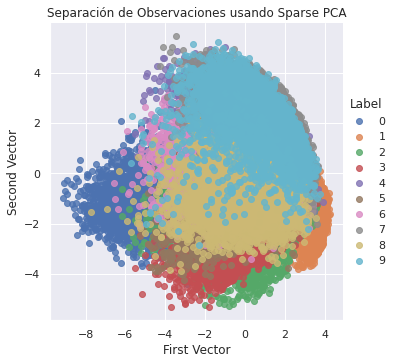

In [105]:
# Sparse PCA
from sklearn.decomposition import SparsePCA

n_components = 100
alpha = 0.0001
random_state = 2018
n_jobs = -1

sparsePCA = SparsePCA(n_components=n_components, \
                alpha=alpha, random_state=random_state, n_jobs=n_jobs)

sparsePCA.fit(X_train.loc[:10000,:])
X_train_sparsePCA = sparsePCA.transform(X_train)
X_train_sparsePCA = pd.DataFrame(data=X_train_sparsePCA, index=train_index)

X_validation_sparsePCA = sparsePCA.transform(X_validation)
X_validation_sparsePCA = \
    pd.DataFrame(data=X_validation_sparsePCA, index=validation_index)

scatterPlot(X_train_sparsePCA, y_train, "Sparse PCA")

#### Kernel PCA <br> <br> Es una forma no lineal de PCA la cual ejecuta una función de similitud (método de kernel) en parejas de los puntos de los datos originales para poder hacer la reducción de dimensionalidad.<br> <br> El PCA Kernel mapea el espacio implícito de las características en donde la mayoría de los puntos de los datos se encuentran y crea el espacio implícito de características en número menor de dimensiones. Este método es efectivo cuando las características originales no se pueden separar linealmente. <br><br> Los hiperparámetros son el número de componentes, el tipo de kernel (el más popular es el Radial Basis Function-RBF) y el coeficiente del kernel (conocido como gamma).

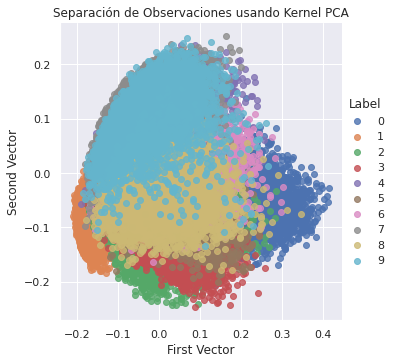

In [106]:
# Kernel PCA
from sklearn.decomposition import KernelPCA

n_components = 100
kernel = 'rbf'
gamma = None
random_state = 2018
n_jobs = 1

kernelPCA = KernelPCA(n_components=n_components, kernel=kernel, \
                      gamma=gamma, n_jobs=n_jobs, random_state=random_state)

kernelPCA.fit(X_train.loc[:10000,:])
X_train_kernelPCA = kernelPCA.transform(X_train)
X_train_kernelPCA = pd.DataFrame(data=X_train_kernelPCA,index=train_index)

X_validation_kernelPCA = kernelPCA.transform(X_validation)
X_validation_kernelPCA = \
    pd.DataFrame(data=X_validation_kernelPCA, index=validation_index)

scatterPlot(X_train_kernelPCA, y_train, "Kernel PCA")

#### 1.2 Descomposición en valores Singulares (SVD) <br> <br> Consiste en reducir el rango de la matriz original de características a un rango menor tal que la matriz original puede re-construirse usando una combinación lineal de algunos vectores en la matriz de rango más pequeña. Es similar a PCA (que usa la descomposición eigen de la matriz de covarianza para hacer la reducción de dimensiones). El SVD usa la descomposición de valores singulares. <br> <br> Los hiperparámetros son: el número de componentes y el número de iteraciones.

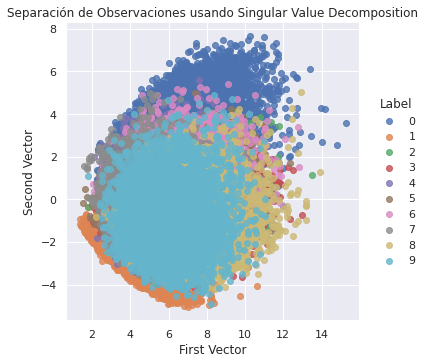

In [107]:
# Singular Value Decomposition
from sklearn.decomposition import TruncatedSVD

n_components = 200
algorithm = 'randomized'
n_iter = 5
random_state = 2018

svd = TruncatedSVD(n_components=n_components, algorithm=algorithm, \
                   n_iter=n_iter, random_state=random_state)

X_train_svd = svd.fit_transform(X_train)
X_train_svd = pd.DataFrame(data=X_train_svd, index=train_index)

X_validation_svd = svd.transform(X_validation)
X_validation_svd = pd.DataFrame(data=X_validation_svd, index=validation_index)

scatterPlot(X_train_svd, y_train, "Singular Value Decomposition")

#### Proyección Aleatoria: ;<br> <br> Se basa en el lemma de Johnson–Lindenstrauss. Puntos en un espacio dimensional mayor pueden ser embebidos en un espacio dimensional menor tal que las distancias entre los puntos son cercanamente mantenidas.

#### 1. Proyección Aleatoria Gaussiana <br> <br> Se puede especificar el número de componentes que quisieramos tener en el espacio reducido de características o podemos definir el hiperparámetro "eps". eps controla la calidad del embebido deacuerdo al lemma de Johnson–Lindenstrauss, en donde valores más pequeños generan un mayor número de dimensiones.

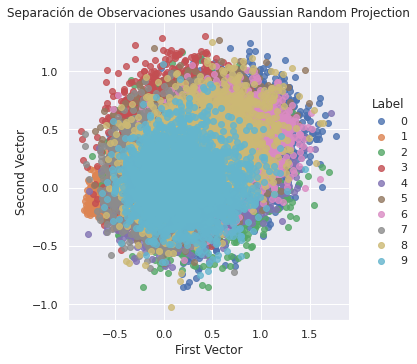

In [108]:
# Gaussian Random Projection
from sklearn.random_projection import GaussianRandomProjection

n_components = 'auto'
eps = 0.5
random_state = 2018

GRP = GaussianRandomProjection(n_components=n_components, eps=eps, \
                               random_state=random_state)

X_train_GRP = GRP.fit_transform(X_train)
X_train_GRP = pd.DataFrame(data=X_train_GRP, index=train_index)

X_validation_GRP = GRP.transform(X_validation)
X_validation_GRP = pd.DataFrame(data=X_validation_GRP, index=validation_index)

scatterPlot(X_train_GRP, y_train, "Gaussian Random Projection")

#### 2. Proyección Aleatoria Esparcida. <br> <br> Retiene un cierto grado de esparcidad en el conjunto transformado de características y es generalmente más eficiente, transformando los datos originales a un espacio reducido más rápidamente que la proyección aleatoria Gaussiana normal.

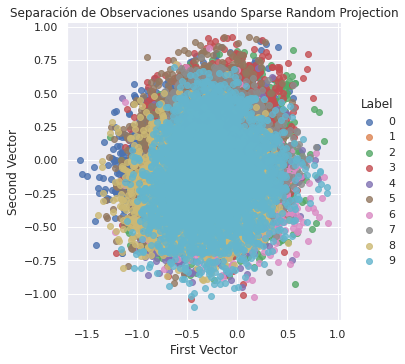

In [109]:
# Sparse Random Projection
from sklearn.random_projection import SparseRandomProjection

n_components = 'auto'
density = 'auto'
eps = 0.5
dense_output = False
random_state = 2018

SRP = SparseRandomProjection(n_components=n_components, \
        density=density, eps=eps, dense_output=dense_output, \
        random_state=random_state)

X_train_SRP = SRP.fit_transform(X_train)
X_train_SRP = pd.DataFrame(data=X_train_SRP, index=train_index)

X_validation_SRP = SRP.transform(X_validation)
X_validation_SRP = pd.DataFrame(data=X_validation_SRP, index=validation_index)

scatterPlot(X_train_SRP, y_train, "Sparse Random Projection")

#### 2. Aprendizaje Múltiple o Reducción de Dimensiones No Lineales. Hay tres tipos: a. ISOMAP(aprende la distancia geodésica) entre puntos. b. Escalamiento Multidimensional (MDS). c. Embeber linealmente local (LLE). d. Embeber el vecino estocástico distribuído (t-SNE). e. Aprendizaje por diccionario. f. Embeber árboles aleatorios. g. Análisis Independiente de Componentes.

#### 2.1. ISOMAP(Mapa Isométrico): <br> <br> Aprende un espacio dimensional menor embebido al conjunto de características originales al calcular la pareja de distancias de todos los puntos, donde la distancia es la distancia curva o geodésica. En otras palabras aprende la geometría intrínsica de los datos originales con base en dónde se encuentra cada punto con respecto a sus vecinos. <br><br> Los hiperparámetros son: el número de vecinos y el número de componentes.

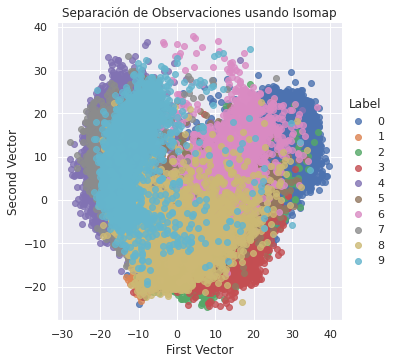

In [110]:
# Isomap

from sklearn.manifold import Isomap

n_neighbors = 5
n_components = 10
n_jobs = 4

isomap = Isomap(n_neighbors=n_neighbors, \
                n_components=n_components, n_jobs=n_jobs)

isomap.fit(X_train.loc[0:5000,:])
X_train_isomap = isomap.transform(X_train)
X_train_isomap = pd.DataFrame(data=X_train_isomap, index=train_index)

X_validation_isomap = isomap.transform(X_validation)
X_validation_isomap = pd.DataFrame(data=X_validation_isomap, \
                                   index=validation_index)

scatterPlot(X_train_isomap, y_train, "Isomap")

#### 2.2. Escalamiento Multidimensional: <br> <br> Aprende la similitud de los puntos en el conjunto de datos original y usando este aprendizaje, lo modela en un espacio dimensional menor.<br><br> Los hiperparámetros son: el número de componentes, número de inicializaciones, número máximo de iteraciones.

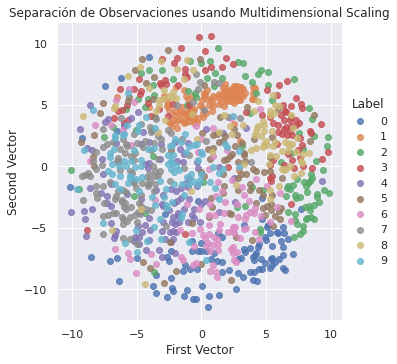

In [111]:
# Multidimensional Scaling
from sklearn.manifold import MDS

n_components = 2
n_init = 12
max_iter = 1200
metric = True
n_jobs = 4
random_state = 2018

mds = MDS(n_components=n_components, n_init=n_init, max_iter=max_iter, \
          metric=metric, n_jobs=n_jobs, random_state=random_state)

X_train_mds = mds.fit_transform(X_train.loc[0:1000,:])
X_train_mds = pd.DataFrame(data=X_train_mds, index=train_index[0:1001])

scatterPlot(X_train_mds, y_train, "Multidimensional Scaling")

#### 2.3. Embebido lineal local (LLE): <br> <br> Preserva las distancias dentro de los vecindarios locales y proyecta los datos del espacio de características originales a un espacio reducido. <br><br>LLE descubre la estructura no lineal en los datos originales de dimensión alta al segmentar los datos en componentes más pequeños (los vecindarios de los puntos) y modela cada componente como un embebido lineal. <br><br>Los hiperparámetros son el número de componentes y el número de puntos a considerar en un vecindario dado.

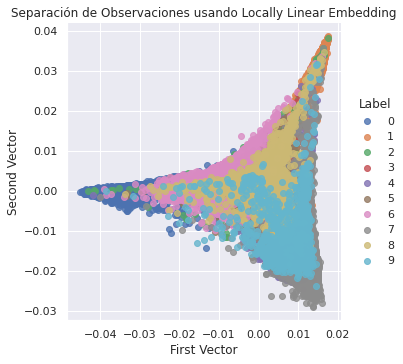

In [112]:
# Locally Linear Embedding (LLE)
from sklearn.manifold import LocallyLinearEmbedding

n_neighbors = 10
n_components = 2
method = 'modified'
n_jobs = 4
random_state = 2018

lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, \
        n_components=n_components, method=method, \
        random_state=random_state, n_jobs=n_jobs)

lle.fit(X_train.loc[0:5000,:])
X_train_lle = lle.transform(X_train)
X_train_lle = pd.DataFrame(data=X_train_lle, index=train_index)

X_validation_lle = lle.transform(X_validation)
X_validation_lle = pd.DataFrame(data=X_validation_lle, index=validation_index)

scatterPlot(X_train_lle, y_train, "Locally Linear Embedding")

#### 2.4. **Embebido de vecino estocástico distribuído (t-Distributed Stochastic Neighbor Embedding:** <br> <br>.- Modela cada punto de alta dimensión en un espacio de dos o tres dimensiones, donde puntos similares son modelados cerca de cada punto y puntos no similares son modelados lejos. <br><br> .- Esto lo hace al construir dos distribuciones de probabilidad, una sobre la pareja de puntos en el espacio de alta dimensión y otra sobre las parejas de puntos en el espacio dimensional menor tal que los puntos similares tienen una alta probabilidad y los puntos no similares una baja probabilidad. <br><br> .- Específicamente, t-SNE minimiza la divergencia Kullback–Leibler entre las dos distribuciones de probabilidad. <br><br> .- En casos reales, se prefiere usar otra técnica de reducción de dimensiones (como el PCA) para reducir el número de dimensiones antes de aplicar t-SNE. Así se reduce el ruido en las características que son alimentadas al t-SNE y así se acelera los cálculos del algoritmo.

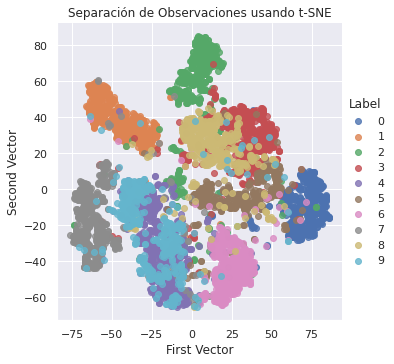

In [113]:
# t-SNE
from sklearn.manifold import TSNE

n_components = 2
learning_rate = 300
perplexity = 30
early_exaggeration = 12
init = 'random'
random_state = 2018

tSNE = TSNE(n_components=n_components, learning_rate=learning_rate, \
            perplexity=perplexity, early_exaggeration=early_exaggeration, \
            init=init, random_state=random_state)

X_train_tSNE = tSNE.fit_transform(X_train_PCA.loc[:5000,:9])
X_train_tSNE = pd.DataFrame(data=X_train_tSNE, index=train_index[:5001])

scatterPlot(X_train_tSNE, y_train, "t-SNE")

#### **Nota:** t-SNE tiene una función de costo no-convexa, por lo que diferentes inicializaciones del algoritmo generarán resultados diferentes. No hay una solución estable.

#### **3. Otros métodos de Reducción de Dimensiones:** <br><br> No tienen como base ninguna métrica de geometría o distancia.

#### **3.1. Aprendizaje por Diccionario:** <br><br> .- Aprende la representación esparcida de los datos originales. La matriz resultante se conoce como "diccionario" y los vectores en el diccionario se llaman "átomos". <br> <br> .- Asumiendo que hay "d" características en los datos originales y "n" átomos en el diccionario, se pueden tener un diccionario subcompleto (n < d), o sobre completo (n > d). <br><br> .- El diccionario subcompleto logra reducir las dimensiones al representar los datos originales con un número menor de vectores. <br><br> .- Los hiperparámentros son el número de componentes, el tamaño del batch y el número de iteraciones para el entrenamiento.

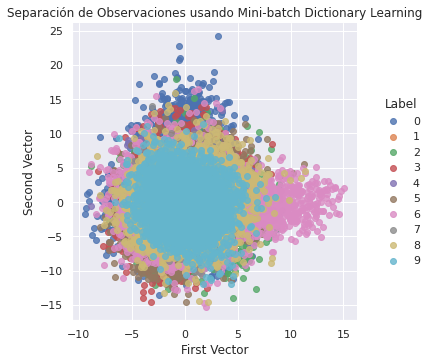

In [114]:
# Mini-batch dictionary learning
from sklearn.decomposition import MiniBatchDictionaryLearning

n_components = 50
alpha = 1
batch_size = 200
n_iter = 25
random_state = 2018

miniBatchDictLearning = MiniBatchDictionaryLearning( \
                        n_components=n_components, alpha=alpha, \
                        batch_size=batch_size, n_iter=n_iter, \
                        random_state=random_state)

miniBatchDictLearning.fit(X_train.loc[:,:10000])
X_train_miniBatchDictLearning = miniBatchDictLearning.fit_transform(X_train)
X_train_miniBatchDictLearning = pd.DataFrame( \
    data=X_train_miniBatchDictLearning, index=train_index)

X_validation_miniBatchDictLearning = \
    miniBatchDictLearning.transform(X_validation)
X_validation_miniBatchDictLearning = \
    pd.DataFrame(data=X_validation_miniBatchDictLearning, \
    index=validation_index)

scatterPlot(X_train_miniBatchDictLearning, y_train, \
            "Mini-batch Dictionary Learning")

#### 3.2. Análisis de Componentes Independientes (ICA): <br><br> Un problema común con datos no etiquetados es que hay muchas señales independientes embebidas en conjunto en las características dadas. Al usar ICA, se pueden separar las señales mezcladas en sus componentes individuales. Al terminar la separación, se puede reconstruir cualquiera de las características originales al sumar en conjunto alguna combinación de las componentes individuales generadas. <br><br> ICA se usa en procesamiento de señales. Por ejemplo, para identificar las voces individuales en un clip de audio de un lugar lleno.

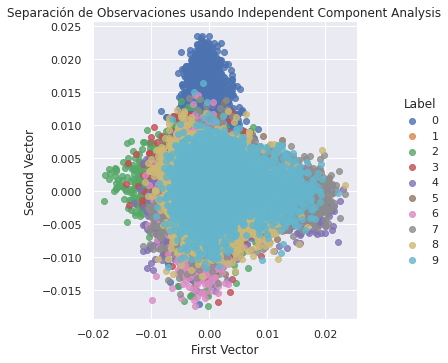

In [115]:
# Independent Component Analysis
from sklearn.decomposition import FastICA

n_components = 25
algorithm = 'parallel'
whiten = True
max_iter = 100
random_state = 2018

fastICA = FastICA(n_components=n_components, algorithm=algorithm, \
                  whiten=whiten, max_iter=max_iter, random_state=random_state)

X_train_fastICA = fastICA.fit_transform(X_train)
X_train_fastICA = pd.DataFrame(data=X_train_fastICA, index=train_index)

X_validation_fastICA = fastICA.transform(X_validation)
X_validation_fastICA = pd.DataFrame(data=X_validation_fastICA, \
                                    index=validation_index)

scatterPlot(X_train_fastICA, y_train, "Independent Component Analysis")

#### Aplicaciones.

#### 1. Detección de Anomalías.

#### Caso:<br><br> El fraude en tarjetas es dificil de detectar y los casos que se detectan son los que puedan dar etiquetas. Pero los fraudes cambian con el tiempo y por lo tanto se necesitan Sistemas de Aprendizaje No Supervisado en estos casos.

#### Importar las bibliotecas.

In [116]:
# Import libraries
'''Main'''
import numpy as np
import pandas as pd
import os, time
import pickle, gzip

'''Data Viz'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [117]:
# Load datasets
current_path = os.getcwd()
file = os.path.sep.join(['', 'datasets', 'credit_card_data', 'creditcard.csv'])
data = pd.read_csv(current_path + file)

In [118]:
dataX = data.copy().drop(['Class'],axis=1)
dataY = data['Class'].copy()

featuresToScale = dataX.columns
sX = pp.StandardScaler(copy=True)
dataX.loc[:,featuresToScale] = sX.fit_transform(dataX[featuresToScale])

X_train, X_test, y_train, y_test = \
    train_test_split(dataX, dataY, test_size=0.33, \
                    random_state=2018, stratify=dataY)

#### .- Se Definen las funciones de evaluación.<br><br> .- El puntaje de anomalía es el error de reconstrucción. <br><br> .- Errores de reconstrucción cercanos a 1 denotan fraude y cercanos a 0 una operación genuina.

In [119]:
def anomalyScores(originalDF, reducedDF):
    loss = np.sum((np.array(originalDF)-np.array(reducedDF))**2, axis=1)
    loss = pd.Series(data=loss,index=originalDF.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss

In [120]:
def plotResults(trueLabels, anomalyScores, returnPreds = False):
    preds = pd.concat([trueLabels, anomalyScores], axis=1)
    preds.columns = ['trueLabel', 'anomalyScore']
    precision, recall, thresholds = \
        precision_recall_curve(preds['trueLabel'],preds['anomalyScore'])
    average_precision = \
        average_precision_score(preds['trueLabel'],preds['anomalyScore'])
    
    plt.step(recall, precision, color='k', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    
    plt.title('Precision-Recall curve: Average Precision = \
    {0:0.2f}'.format(average_precision))

    fpr, tpr, thresholds = roc_curve(preds['trueLabel'], \
                                     preds['anomalyScore'])
    areaUnderROC = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: \
    Area under the curve = {0:0.2f}'.format(areaUnderROC))
    plt.legend(loc="lower right")
    plt.show()
    
    if returnPreds==True:
        return preds

In [121]:
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)

#### **PCA**

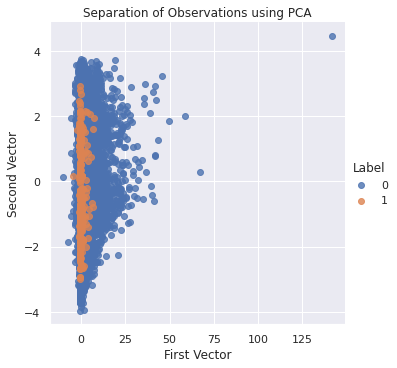

In [122]:
# 30 principal components
from sklearn.decomposition import PCA

n_components = 30
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse, \
                                   index=X_train.index)

scatterPlot(X_train_PCA, y_train, "PCA")

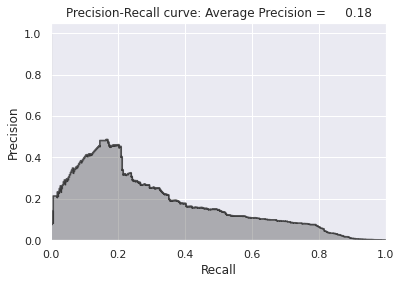

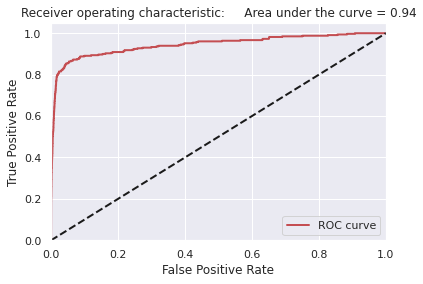

In [123]:
anomalyScoresPCA = anomalyScores(X_train, X_train_PCA_inverse)
preds = plotResults(y_train, anomalyScoresPCA, True)

#### 27 componentes principales

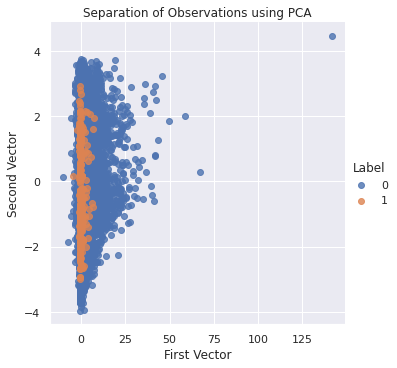

In [124]:
from sklearn.decomposition import PCA

n_components = 27
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse, \
                                   index=X_train.index)

scatterPlot(X_train_PCA, y_train, "PCA")

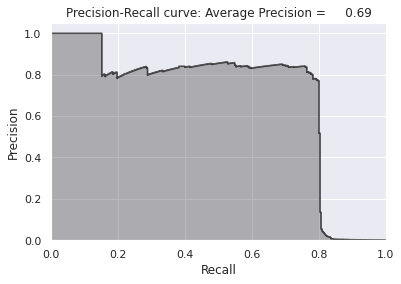

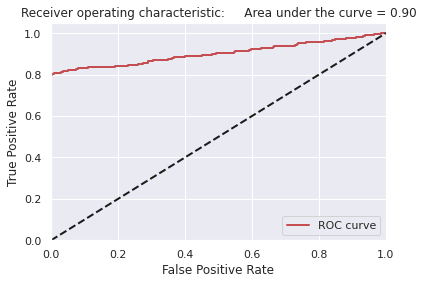

In [125]:
anomalyScoresPCA = anomalyScores(X_train, X_train_PCA_inverse)
preds = plotResults(y_train, anomalyScoresPCA, True)

In [126]:
preds.sort_values(by="anomalyScore",ascending=False,inplace=True)
cutoff = 350
predsTop = preds[:cutoff]
print("Precision: ",np.round(predsTop. \
            anomalyScore[predsTop.trueLabel==1].count()/cutoff,2))
print("Recall: ",np.round(predsTop. \
            anomalyScore[predsTop.trueLabel==1].count()/y_train.sum(),2))
print("Fraud Caught out of 330 Cases:", predsTop.trueLabel.sum())

Precision:  0.75
Recall:  0.8
Fraud Caught out of 330 Cases: 264


#### **Sparse PCA**

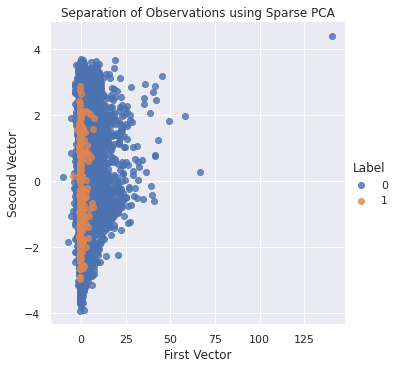

In [127]:
# Sparse PCA
from sklearn.decomposition import SparsePCA

n_components = 27
alpha = 0.0001
random_state = 2018
n_jobs = -1

sparsePCA = SparsePCA(n_components=n_components, \
                alpha=alpha, random_state=random_state, n_jobs=n_jobs)

sparsePCA.fit(X_train.loc[:,:])
X_train_sparsePCA = sparsePCA.transform(X_train)
X_train_sparsePCA = pd.DataFrame(data=X_train_sparsePCA, index=X_train.index)

scatterPlot(X_train_sparsePCA, y_train, "Sparse PCA")

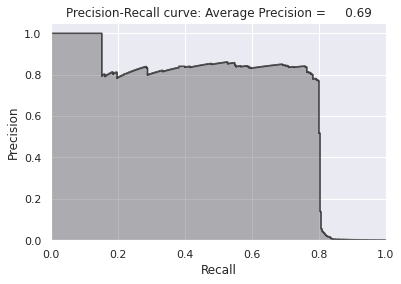

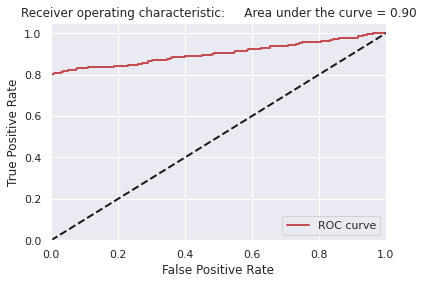

In [128]:
X_train_sparsePCA_inverse = np.array(X_train_sparsePCA). \
    dot(sparsePCA.components_) + np.array(X_train.mean(axis=0))
X_train_sparsePCA_inverse = \
    pd.DataFrame(data=X_train_sparsePCA_inverse, index=X_train.index)

anomalyScoresSparsePCA = anomalyScores(X_train, X_train_sparsePCA_inverse)
preds = plotResults(y_train, anomalyScoresSparsePCA, True)

#### **Kernel PCA**

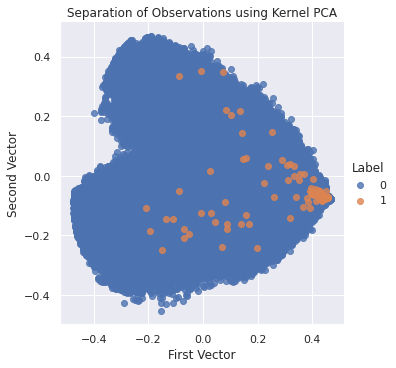

In [129]:
# Kernel PCA
from sklearn.decomposition import KernelPCA

n_components = 27
kernel = 'rbf'
gamma = None
fit_inverse_transform = True
random_state = 2018
n_jobs = 1

kernelPCA = KernelPCA(n_components=n_components, kernel=kernel, \
                gamma=gamma, fit_inverse_transform= \
                fit_inverse_transform, n_jobs=n_jobs, \
                random_state=random_state)

kernelPCA.fit(X_train.iloc[:2000])
X_train_kernelPCA = kernelPCA.transform(X_train)
X_train_kernelPCA = pd.DataFrame(data=X_train_kernelPCA, \
                                 index=X_train.index)

X_train_kernelPCA_inverse = kernelPCA.inverse_transform(X_train_kernelPCA)
X_train_kernelPCA_inverse = pd.DataFrame(data=X_train_kernelPCA_inverse, \
                                         index=X_train.index)

scatterPlot(X_train_kernelPCA, y_train, "Kernel PCA")

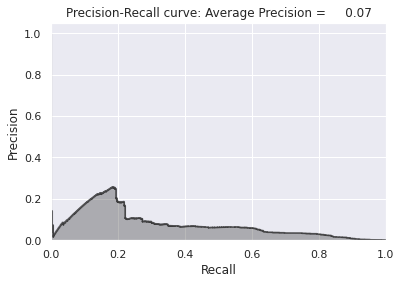

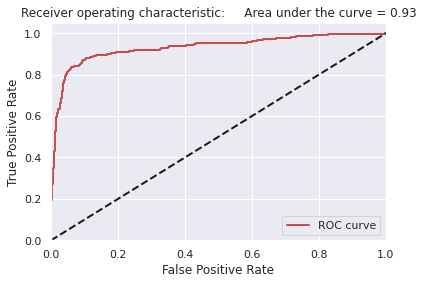

In [130]:
anomalyScoresKernelPCA = anomalyScores(X_train, X_train_kernelPCA_inverse)
preds = plotResults(y_train, anomalyScoresKernelPCA, True)

#### **Proyección Aleatoria Gaussiana**

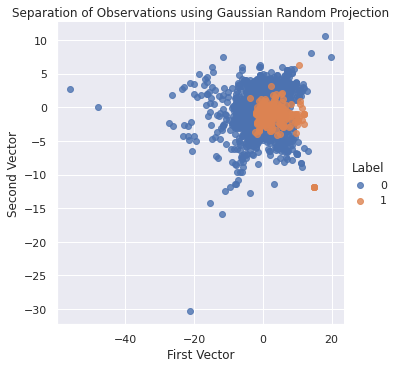

In [131]:
from sklearn.random_projection import GaussianRandomProjection

n_components = 27
eps = None
random_state = 2018

GRP = GaussianRandomProjection(n_components=n_components, \
                               eps=eps, random_state=random_state)

X_train_GRP = GRP.fit_transform(X_train)
X_train_GRP = pd.DataFrame(data=X_train_GRP, index=X_train.index)

scatterPlot(X_train_GRP, y_train, "Gaussian Random Projection")

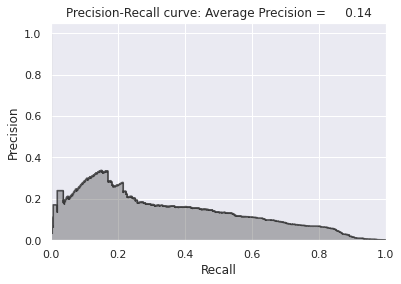

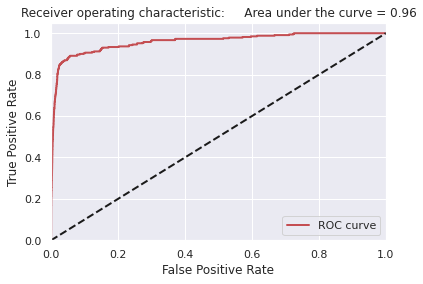

In [132]:
X_train_GRP_inverse = np.array(X_train_GRP).dot(GRP.components_)
X_train_GRP_inverse = pd.DataFrame(data=X_train_GRP_inverse, \
                                   index=X_train.index)

anomalyScoresGRP = anomalyScores(X_train, X_train_GRP_inverse)
preds = plotResults(y_train, anomalyScoresGRP, True)

#### **Proyección Esparcida Aleatoria**

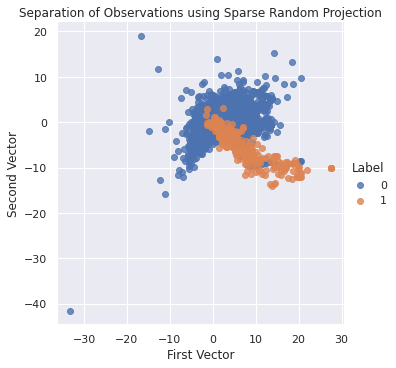

In [133]:
from sklearn.random_projection import SparseRandomProjection

n_components = 27
density = 'auto'
eps = .01
dense_output = True
random_state = 2018

SRP = SparseRandomProjection(n_components=n_components, \
        density=density, eps=eps, dense_output=dense_output, \
                                random_state=random_state)

X_train_SRP = SRP.fit_transform(X_train)
X_train_SRP = pd.DataFrame(data=X_train_SRP, index=X_train.index)

scatterPlot(X_train_SRP, y_train, "Sparse Random Projection")

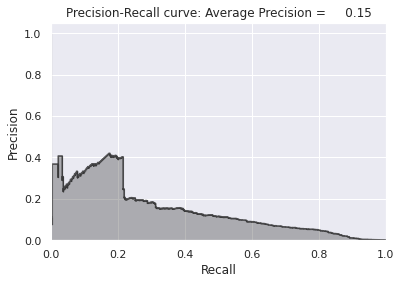

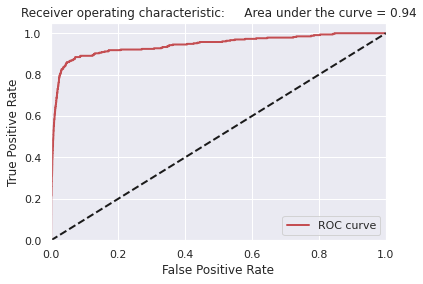

In [134]:
X_train_SRP_inverse = np.array(X_train_SRP).dot(SRP.components_.todense())
X_train_SRP_inverse = pd.DataFrame(data=X_train_SRP_inverse, index=X_train.index)

anomalyScoresSRP = anomalyScores(X_train, X_train_SRP_inverse)
plotResults(y_train, anomalyScoresSRP)

#### **Aprendizaje por diccionarios Mini-batch**

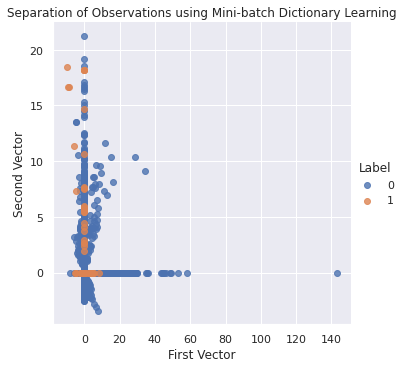

In [135]:
from sklearn.decomposition import MiniBatchDictionaryLearning
n_components = 28
alpha = 1
batch_size = 200
n_iter = 10
random_state = 2018

miniBatchDictLearning = MiniBatchDictionaryLearning( \
    n_components=n_components, alpha=alpha, batch_size=batch_size, \
    n_iter=n_iter, random_state=random_state)

miniBatchDictLearning.fit(X_train)
X_train_miniBatchDictLearning = \
    miniBatchDictLearning.fit_transform(X_train)
X_train_miniBatchDictLearning = \
    pd.DataFrame(data=X_train_miniBatchDictLearning, index=X_train.index)

scatterPlot(X_train_miniBatchDictLearning, y_train, \
            "Mini-batch Dictionary Learning")

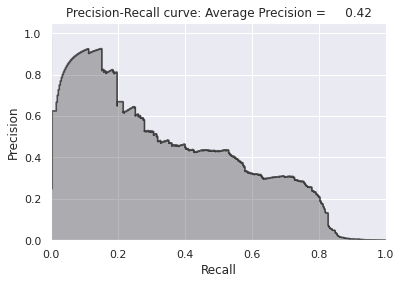

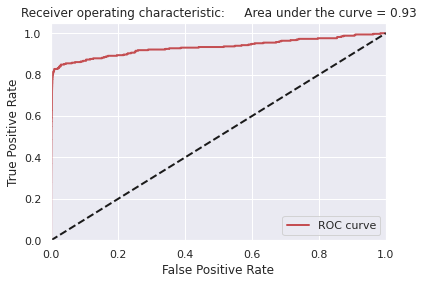

In [136]:
X_train_miniBatchDictLearning_inverse = \
    np.array(X_train_miniBatchDictLearning). \
    dot(miniBatchDictLearning.components_)

X_train_miniBatchDictLearning_inverse = \
    pd.DataFrame(data=X_train_miniBatchDictLearning_inverse, \
                 index=X_train.index)

anomalyScoresMiniBatchDictLearning = anomalyScores(X_train, \
    X_train_miniBatchDictLearning_inverse)
preds = plotResults(y_train, anomalyScoresMiniBatchDictLearning, True)

#### **Análisis de Componentes Independientes**

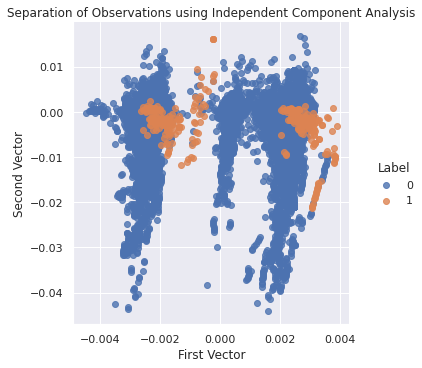

In [137]:
from sklearn.decomposition import FastICA

n_components = 27
algorithm = 'parallel'
whiten = True
max_iter = 200
random_state = 2018

fastICA = FastICA(n_components=n_components, \
    algorithm=algorithm, whiten=whiten, max_iter=max_iter, \
    random_state=random_state)

X_train_fastICA = fastICA.fit_transform(X_train)
X_train_fastICA = pd.DataFrame(data=X_train_fastICA, index=X_train.index)

X_train_fastICA_inverse = fastICA.inverse_transform(X_train_fastICA)
X_train_fastICA_inverse = pd.DataFrame(data=X_train_fastICA_inverse, \
                                       index=X_train.index)

scatterPlot(X_train_fastICA, y_train, "Independent Component Analysis")

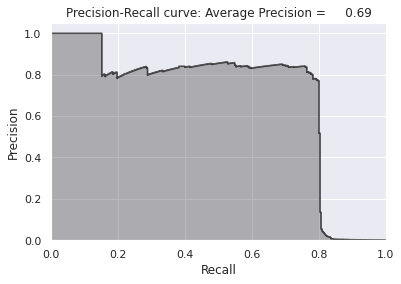

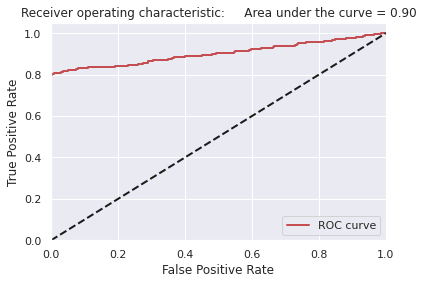

In [138]:
anomalyScoresFastICA = anomalyScores(X_train, X_train_fastICA_inverse)
plotResults(y_train, anomalyScoresFastICA)

#### **PCA en el conjunto de prueba.**

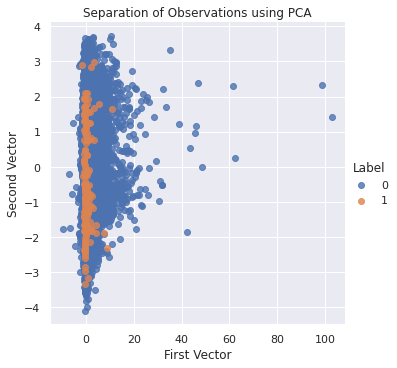

In [139]:
X_test_PCA = pca.transform(X_test)
X_test_PCA = pd.DataFrame(data=X_test_PCA, index=X_test.index)

X_test_PCA_inverse = pca.inverse_transform(X_test_PCA)
X_test_PCA_inverse = pd.DataFrame(data=X_test_PCA_inverse, \
                                  index=X_test.index)

scatterPlot(X_test_PCA, y_test, "PCA")

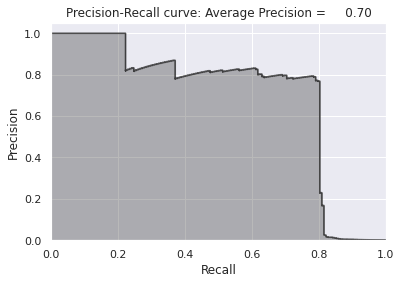

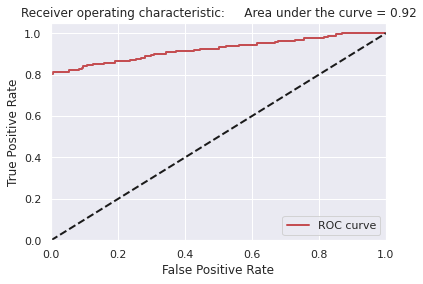

In [140]:
anomalyScoresPCA = anomalyScores(X_test, X_test_PCA_inverse)
preds = plotResults(y_test, anomalyScoresPCA, True)

#### **ICA** en el conjunto de prueba.

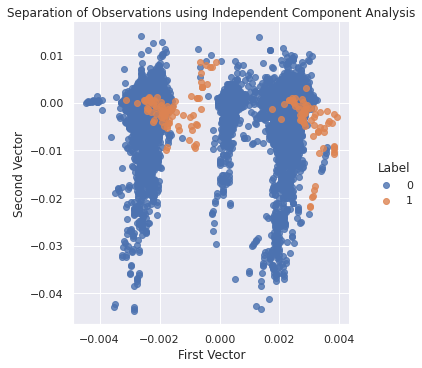

In [141]:
X_test_fastICA = fastICA.transform(X_test)
X_test_fastICA = pd.DataFrame(data=X_test_fastICA, index=X_test.index)

X_test_fastICA_inverse = fastICA.inverse_transform(X_test_fastICA)
X_test_fastICA_inverse = pd.DataFrame(data=X_test_fastICA_inverse, \
                                      index=X_test.index)

scatterPlot(X_test_fastICA, y_test, "Independent Component Analysis")

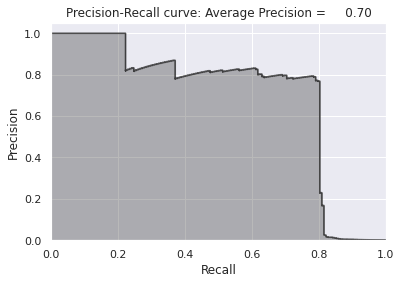

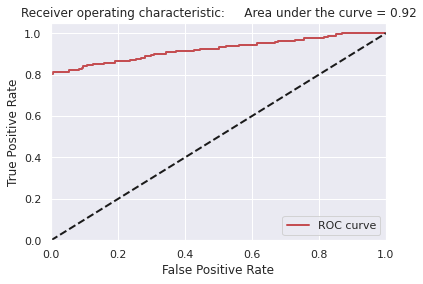

In [142]:
anomalyScoresFastICA = anomalyScores(X_test, X_test_fastICA_inverse)
plotResults(y_test, anomalyScoresFastICA)

#### **Aprendizaje por diccionario en el conjunto de prueba.**

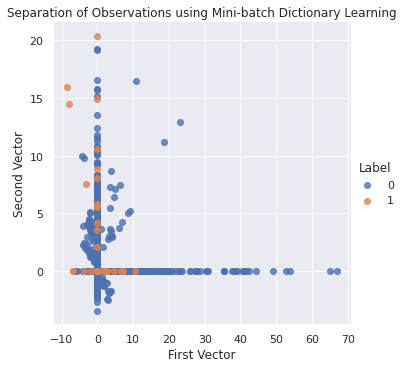

In [143]:
X_test_miniBatchDictLearning = miniBatchDictLearning.transform(X_test)
X_test_miniBatchDictLearning = \
    pd.DataFrame(data=X_test_miniBatchDictLearning, index=X_test.index)

scatterPlot(X_test_miniBatchDictLearning, y_test, \
            "Mini-batch Dictionary Learning")

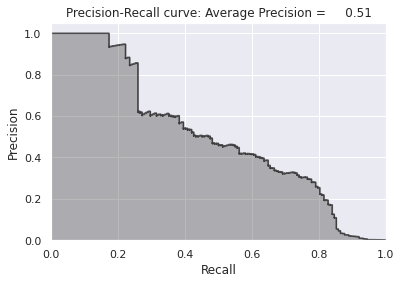

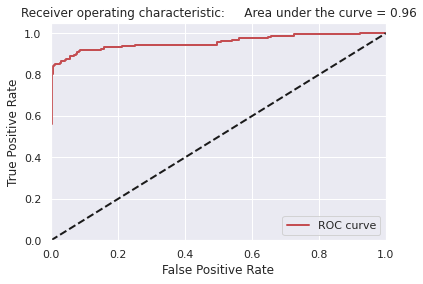

In [144]:
X_test_miniBatchDictLearning_inverse = \
    np.array(X_test_miniBatchDictLearning). \
    dot(miniBatchDictLearning.components_)

X_test_miniBatchDictLearning_inverse = \
    pd.DataFrame(data=X_test_miniBatchDictLearning_inverse, \
                 index=X_test.index)

anomalyScoresMiniBatchDictLearning = anomalyScores(X_test, \
    X_test_miniBatchDictLearning_inverse)
preds = plotResults(y_test, anomalyScoresMiniBatchDictLearning, True)

#### 2. **Agrupamiento o "Clustering"** <br><br> Se agrupan los datos con base a similitud. El agrupamiento se realiza sin usar ninguna etiqueta, comparando que tan similar son los datos para una observación con respecto a los datos de otras observaciones y grupos.

#### Importar bibliotecas.

In [145]:
'''Principal'''
import numpy as np
import pandas as pd
import os, time
import pickle, gzip

'''Visualizacion'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

'''Algorithms'''
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import fastcluster
from scipy.cluster.hierarchy import dendrogram, cophenet, fcluster
from scipy.spatial.distance import pdist

#### **Cargar el conjunto de datos.**

In [146]:
current_path = os.getcwd()
file = os.path.sep.join(['', 'datasets', 'mnist_data', 'mnist.pkl.gz'])

f = gzip.open(current_path+file, 'rb')
train_set, validation_set, test_set = pickle.load(f, encoding='latin1')
f.close()

X_train, y_train = train_set[0], train_set[1]
X_validation, y_validation = validation_set[0], validation_set[1]
X_test, y_test = test_set[0], test_set[1]

### **Se crean los dataframes por medio de pandas.**

In [147]:
train_index = range(0,len(X_train))
validation_index = range(len(X_train), \
                         len(X_train)+len(X_validation))
test_index = range(len(X_train)+len(X_validation), \
                   len(X_train)+len(X_validation)+len(X_test))

X_train = pd.DataFrame(data=X_train,index=train_index)
y_train = pd.Series(data=y_train,index=train_index)

X_validation = pd.DataFrame(data=X_validation,index=validation_index)
y_validation = pd.Series(data=y_validation,index=validation_index)

X_test = pd.DataFrame(data=X_test,index=test_index)
y_test = pd.Series(data=y_test,index=test_index)

#### **Análisis de Componentes Principales (PCA)**

In [148]:
from sklearn.decomposition import PCA

n_components = 784
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)

X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=train_index)

#### **K-means - La inercia varía con el número de grupos.**

#### .- Se especifica el número deseable de grupos ***k***, y el algoritmo asignará cada instancia exactamente a uno de los ***k*** grupos. <br><br>.-Esto optimiza el agrupamiento al minimizar la variación dentro del "cluster" (esto se conoce como ***Inercia***) tal que la suma de las variaciones en los diferentes grupos ***k*** es la más pequeña posible. <br><br> .- Para acelerar el proceso de agrupamiento, ***K-Means*** asigna aleatoriamente cada observación a uno de los ***K*** grupos y después re-asigna estas observaciones para minimizar la distancia Euclideana entre cada observación y el punto central del grupo conocido como ***Centroide***. .-<br> <br> El resultado, al realizar varias corridas de cada ***K-Means***, con un inicio aleatorio dará una asignación aleatoria de las observaciones. <br><br> .- De las diferentes corridas, se selecciona la que tenga la mejor separación, definida como la que tenga la menor suma dentro del grupo de variaciones para todos los ***k-grupos***. 

In [149]:
from sklearn.cluster import KMeans

n_clusters = 10
n_init = 10
max_iter = 300
tol = 0.0001
random_state = 2018
n_jobs = 2

kMeans_inertia = pd.DataFrame(data=[],index=range(2,21), \
                              columns=['inertia'])
for n_clusters in range(2,21):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, \
                max_iter=max_iter, tol=tol, random_state=random_state, \
                n_jobs=n_jobs)

    cutoff = 99
    kmeans.fit(X_train_PCA.loc[:,0:cutoff])
    kMeans_inertia.loc[n_clusters] = kmeans.inertia_

/home/carlos/anaconda3/envs/rdp/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/carlos/anaconda3/envs/rdp/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/carlos/anaconda3/envs/rdp/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/carlos/anaconda3/envs/rdp/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/carlos/anaconda3/envs/rdp/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.

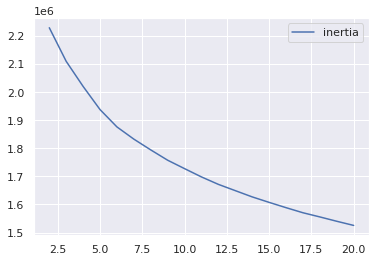

In [150]:
kMeans_inertia.plot()

In [151]:
def analyzeCluster(clusterDF, labelsDF):
    countByCluster = \
        pd.DataFrame(data=clusterDF['cluster'].value_counts())
    countByCluster.reset_index(inplace=True,drop=False)
    countByCluster.columns = ['cluster','clusterCount']
        
    preds = pd.concat([labelsDF,clusterDF], axis=1)
    preds.columns = ['trueLabel','cluster']
    
    countByLabel = pd.DataFrame(data=preds.groupby('trueLabel').count())
        
    countMostFreq = \
        pd.DataFrame(data=preds.groupby('cluster').agg( \
                        lambda x:x.value_counts().iloc[0]))
    countMostFreq.reset_index(inplace=True,drop=False)
    countMostFreq.columns = ['cluster','countMostFrequent']
    
    accuracyDF = countMostFreq.merge(countByCluster, \
                        left_on="cluster",right_on="cluster")
    overallAccuracy = accuracyDF.countMostFrequent.sum()/ \
                        accuracyDF.clusterCount.sum()
    
    accuracyByLabel = accuracyDF.countMostFrequent/ \
                        accuracyDF.clusterCount
    
    return countByCluster, countByLabel, countMostFreq, \
            accuracyDF, overallAccuracy, accuracyByLabel

#### K-means - Accuracy al variar el número de grupos.

In [152]:
n_clusters = 5
n_init = 10
max_iter = 300
tol = 0.0001
random_state = 2018
n_jobs = 2

kMeans_inertia = \
    pd.DataFrame(data=[],index=range(2,21),columns=['inertia'])
overallAccuracy_kMeansDF = \
    pd.DataFrame(data=[],index=range(2,21),columns=['overallAccuracy'])

for n_clusters in range(2,21):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, \
                max_iter=max_iter, tol=tol, random_state=random_state, \
                n_jobs=n_jobs)

    cutoff = 99
    kmeans.fit(X_train_PCA.loc[:,0:cutoff])
    kMeans_inertia.loc[n_clusters] = kmeans.inertia_
    X_train_kmeansClustered = kmeans.predict(X_train_PCA.loc[:,0:cutoff])
    X_train_kmeansClustered = \
        pd.DataFrame(data=X_train_kmeansClustered, index=X_train.index, \
                     columns=['cluster'])
    
    countByCluster_kMeans, countByLabel_kMeans, countMostFreq_kMeans, \
        accuracyDF_kMeans, overallAccuracy_kMeans, accuracyByLabel_kMeans \
        = analyzeCluster(X_train_kmeansClustered, y_train)
    
    overallAccuracy_kMeansDF.loc[n_clusters] = overallAccuracy_kMeans

/home/carlos/anaconda3/envs/rdp/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/carlos/anaconda3/envs/rdp/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/carlos/anaconda3/envs/rdp/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/carlos/anaconda3/envs/rdp/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/carlos/anaconda3/envs/rdp/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.

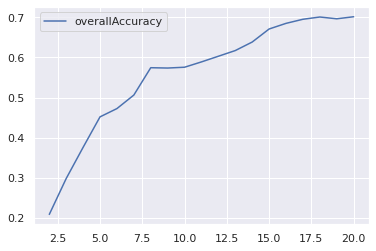

In [153]:
overallAccuracy_kMeansDF.plot()

In [154]:
accuracyByLabel_kMeans

0     0.638099
1     0.928605
2     0.848953
3     0.523199
4     0.714235
5     0.950927
6     0.893103
7     0.918663
8     0.405734
9     0.501399
10    0.382075
11    0.586814
12    0.463228
13    0.958046
14    0.869703
15    0.942350
16    0.789613
17    0.843741
18    0.455679
19    0.928215
dtype: float64

#### K-means - Accuracy en función del número de componentes.

In [155]:
n_clusters = 20
n_init = 10
max_iter = 300
tol = 0.0001
random_state = 2018
n_jobs = 2

kMeans_inertia = pd.DataFrame(data=[],index=[9, 49, 99, 199, \
                    299, 399, 499, 599, 699, 783],columns=['inertia'])

overallAccuracy_kMeansDF = pd.DataFrame(data=[],index=[9, 49, \
                    99, 199, 299, 399, 499, 599, 699, 783], \
                    columns=['overallAccuracy'])

for cutoffNumber in [9, 49, 99, 199, 299, 399, 499, 599, 699, 783]:
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, \
                max_iter=max_iter, tol=tol, random_state=random_state, \
                n_jobs=n_jobs)

    cutoff = cutoffNumber
    kmeans.fit(X_train_PCA.loc[:,0:cutoff])
    kMeans_inertia.loc[cutoff] = kmeans.inertia_
    X_train_kmeansClustered = kmeans.predict(X_train_PCA.loc[:,0:cutoff])
    X_train_kmeansClustered = pd.DataFrame(data=X_train_kmeansClustered, \
                                index=X_train.index, columns=['cluster'])
    
    countByCluster_kMeans, countByLabel_kMeans, countMostFreq_kMeans, \
        accuracyDF_kMeans, overallAccuracy_kMeans, accuracyByLabel_kMeans \
        = analyzeCluster(X_train_kmeansClustered, y_train)
    
    overallAccuracy_kMeansDF.loc[cutoff] = overallAccuracy_kMeans

/home/carlos/anaconda3/envs/rdp/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/carlos/anaconda3/envs/rdp/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/carlos/anaconda3/envs/rdp/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/carlos/anaconda3/envs/rdp/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/carlos/anaconda3/envs/rdp/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.

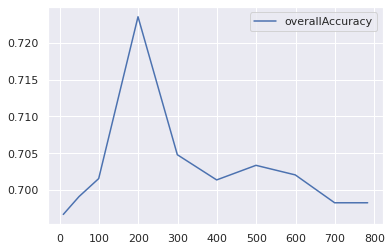

In [156]:
overallAccuracy_kMeansDF.plot()

#### K-means - Accuracy como varía el número de componentes.<br><br> En los datos originales de MNIST (No reducidos por PCA).

In [157]:
n_clusters = 20
n_init = 10
max_iter = 300
tol = 0.0001
random_state = 2018
n_jobs = 2

kMeans_inertia = pd.DataFrame(data=[],index=[9, 49, 99, 199, \
                    299, 399, 499, 599, 699, 783],columns=['inertia'])

overallAccuracy_kMeansDF = pd.DataFrame(data=[],index=[9, 49, \
                    99, 199, 299, 399, 499, 599, 699, 783], \
                    columns=['overallAccuracy'])

for cutoffNumber in [9, 49, 99, 199, 299, 399, 499, 599, 699, 783]:
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, \
                max_iter=max_iter, tol=tol, random_state=random_state, \
                n_jobs=n_jobs)

    cutoff = cutoffNumber
    kmeans.fit(X_train.loc[:,0:cutoff])
    kMeans_inertia.loc[cutoff] = kmeans.inertia_
    X_train_kmeansClustered = kmeans.predict(X_train.loc[:,0:cutoff])
    X_train_kmeansClustered = pd.DataFrame(data=X_train_kmeansClustered, \
                                index=X_train.index, columns=['cluster'])
    
    countByCluster_kMeans, countByLabel_kMeans, countMostFreq_kMeans, \
        accuracyDF_kMeans, overallAccuracy_kMeans, accuracyByLabel_kMeans \
        = analyzeCluster(X_train_kmeansClustered, y_train)
    
    overallAccuracy_kMeansDF.loc[cutoff] = overallAccuracy_kMeans

/home/carlos/anaconda3/envs/rdp/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/carlos/anaconda3/envs/rdp/lib/python3.6/site-packages/ipykernel_launcher.py:21: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (20). Possibly due to duplicate points in X.
/home/carlos/anaconda3/envs/rdp/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/carlos/anaconda3/envs/rdp/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/carlos/anaconda3/envs/rdp/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.2

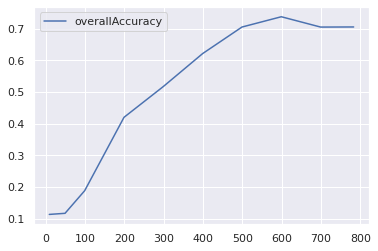

In [158]:
overallAccuracy_kMeansDF.plot()

#### Agrupamiento Jerárquico.

In [159]:
import fastcluster
from scipy.cluster.hierarchy import dendrogram, cophenet
from scipy.spatial.distance import pdist

cutoff = 99
Z = fastcluster.linkage_vector(X_train_PCA.loc[:,0:cutoff], \
                               method='ward', metric='euclidean')
Z_dataFrame = pd.DataFrame(data=Z, \
    columns=['clusterOne','clusterTwo','distance','newClusterSize'])

In [160]:
Z_dataFrame.iloc[:20]

,clusterOne,clusterTwo,distance,newClusterSize
0,42194.0,43025.0,0.562818,2.0
1,28350.0,37674.0,0.590923,2.0
2,26696.0,44705.0,0.621496,2.0
3,12634.0,32823.0,0.627762,2.0
4,24707.0,43151.0,0.637643,2.0
5,20465.0,24483.0,0.662488,2.0
6,466.0,42098.0,0.664151,2.0
7,46542.0,49961.0,0.665528,2.0
8,2301.0,5732.0,0.671080,2.0
9,37564.0,47668.0,0.675108,2.0


In [161]:
Z_dataFrame.iloc[49980:]

,clusterOne,clusterTwo,distance,newClusterSize
49980,99961.0,99976.0,172.296110,3248.0
49981,99954.0,99974.0,177.594223,5680.0
49982,99934.0,99975.0,183.939634,3862.0
49983,99943.0,99971.0,184.261961,4897.0
49984,99951.0,99966.0,189.035111,3820.0
49985,99962.0,99978.0,189.535192,6051.0
49986,99970.0,99977.0,198.547535,6364.0
49987,99956.0,99973.0,205.242596,6070.0
49988,99963.0,99980.0,226.697039,4892.0
49989,99945.0,99979.0,229.226080,5315.0


In [162]:
from scipy.cluster.hierarchy import fcluster

distance_threshold = 160
clusters = fcluster(Z, distance_threshold, criterion='distance')
X_train_hierClustered = \
    pd.DataFrame(data=clusters,index=X_train_PCA.index,columns=['cluster'])

In [163]:
print("Number of distinct clusters: ", \
      len(X_train_hierClustered['cluster'].unique()))

Number of distinct clusters:  20


In [164]:
countByCluster_hierClust, countByLabel_hierClust, \
    countMostFreq_hierClust, accuracyDF_hierClust, \
    overallAccuracy_hierClust, accuracyByLabel_hierClust \
    = analyzeCluster(X_train_hierClustered, y_train)

print("Overall accuracy from hierarchical clustering: ", \
      overallAccuracy_hierClust)

Overall accuracy from hierarchical clustering:  0.77268


In [165]:
print("Accuracy by cluster for hierarchical clustering")
accuracyByLabel_hierClust

Accuracy by cluster for hierarchical clustering


0     0.917068
1     0.505117
2     0.503444
3     0.559322
4     0.969558
5     0.991484
6     0.984788
7     0.982719
8     0.985955
9     0.989979
10    0.991837
11    0.413056
12    0.960112
13    0.526806
14    0.402222
15    0.906386
16    0.952848
17    0.945466
18    0.989378
19    0.978018
dtype: float64

#### **Algoritmo DBSCAN (Agrupamiento de Aplicaciones con Ruido Espaciales de Densidad"): Es un algoritmo de agrupamiento (basado en la densidad de los puntos)** <br><br> .- Dada todas las instancias en el espacio, agrupará aquellos puntos cercanos (esto es el número mínimo de instancias que deberían existir dentro de cierta distancia). <br><br>.- Se especifican el mínimo número de instancias requeridas y la distancia. Si una instancia está dentro de la distancia de muchos grupos, será agrupada con el grupo en donde se encuentre densamente localizada. <br><br> .- Cualquier instancia que no esté dentro de la distancia de otro grupo se etiquetará como un valor atípico. <br><br> .- No se necesita pre-especificar el número de grupos. Los grupos pueden tener cualquier forma y el algoritmo no es propenso a distorsiones causadas por valores atípicos en los datos.

In [166]:
from sklearn.cluster import DBSCAN

eps = 3
min_samples = 5
leaf_size = 30
n_jobs = 4

db = DBSCAN(eps=eps, min_samples=min_samples, leaf_size=leaf_size, 
            n_jobs=n_jobs)

cutoff = 99
X_train_PCA_dbscanClustered = db.fit_predict(X_train_PCA.loc[:,0:cutoff])
X_train_PCA_dbscanClustered = \
    pd.DataFrame(data=X_train_PCA_dbscanClustered, index=X_train.index, \
                 columns=['cluster'])

countByCluster_dbscan, countByLabel_dbscan, countMostFreq_dbscan, \
    accuracyDF_dbscan, overallAccuracy_dbscan, accuracyByLabel_dbscan \
    = analyzeCluster(X_train_PCA_dbscanClustered, y_train)

overallAccuracy_dbscan

0.242

In [167]:
print("Overall accuracy from DBSCAN: ",overallAccuracy_dbscan)

Overall accuracy from DBSCAN:  0.242


In [168]:
print("Cluster results for DBSCAN")
countByCluster_dbscan

Cluster results for DBSCAN


,cluster,clusterCount
0,-1,39575
1,0,8885
2,8,720
3,5,92
4,18,51
...,...,...
95,43,4
96,83,4
97,11,4
98,54,3


#### **Algoritmo HDBSCAN** <br><br> .- Es el DBSCAN jerárquico. Convierte el algoritmo DBSCAN a un algoritmo de agrupamiento jerárquico. En otras palabras, los grupos se crean con base a densidad y después los une iterativamente con base a la distancia.

In [169]:
import hdbscan

min_cluster_size = 30
min_samples = None
alpha = 1.0
cluster_selection_method = 'eom'

hdb = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, \
        min_samples=min_samples, alpha=alpha, \
        cluster_selection_method=cluster_selection_method)

cutoff = 10
X_train_PCA_hdbscanClustered = \
    hdb.fit_predict(X_train_PCA.loc[:,0:cutoff])

X_train_PCA_hdbscanClustered = \
    pd.DataFrame(data=X_train_PCA_hdbscanClustered, \
    index=X_train.index, columns=['cluster'])

countByCluster_hdbscan, countByLabel_hdbscan, \
    countMostFreq_hdbscan, accuracyDF_hdbscan, \
    overallAccuracy_hdbscan, accuracyByLabel_hdbscan \
    = analyzeCluster(X_train_PCA_hdbscanClustered, y_train)

In [170]:
print("Overall accuracy from HDBSCAN: ",overallAccuracy_hdbscan)

Overall accuracy from HDBSCAN:  0.24362


In [171]:
print("Cluster results for HDBSCAN")
countByCluster_hdbscan

Cluster results for HDBSCAN


,cluster,clusterCount
0,-1,42739
1,5,5139
2,7,942
3,0,480
4,6,296
5,3,252
6,1,73
7,4,46
8,2,33


#### **2. Segmentación de grupos.**
#### **Caso:** <br><br> El poder segmentar miembros en grupos con base a similitudes sin ninguna guía (etiquetas) es muy poderoso. Por ejemplo, esto permite identificar diferentes grupos de consumidores en ventas por internet. Permitiendo así definir una estrategia de mercadeo para cada uno de los grupos (por ejemplo: compradores con presupuesto limitado, personas interesadas en la moda, tecnología, audiofilos, etc). Esto permite mejorar la publicidad en línea para segmentos objetivos y así dar recomendaciones para los compradores.

#### El conjunto de datos proviene del Club de Préstamos (Compañía de Préstamos en Estados Unidos). Las personas buscan préstamos de $1,000 a $40,000.00 en la modalidad de préstamos personales no asegurados, por un período de 3 a 5 años.<br><br> Los inversionistas buscan en las solicitudes y escogen financiar los préstamos con base al historial crediticio del solicitante, el monto solicitado, la calificación del préstamo, y el propósito del mismo. Los inversionistas ganan dinero por medio de los intereses pagados por el préstamo, y el Club de Préstamos hace su dinero de las tarifas para originar la solicitud de préstamo y cargos por servicio.<br><br> Los datos corresponden al período 2007–2011 y son de acceso público en la págine del "Lending Club".

#### **.- Se importan las bibliotecas**

In [172]:

'''Main'''
import numpy as np
import pandas as pd
import os, time, re
import pickle, gzip

'''Data Visualization'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

'''Algorithms'''
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import fastcluster
from scipy.cluster.hierarchy import dendrogram, cophenet, fcluster
from scipy.spatial.distance import pdist

**.- Carga de los datos**

In [173]:

current_path = os.getcwd()
file = os.path.sep.join(['', 'datasets', 'lending_club_data', 'LoanStats3a.csv'])
data = pd.read_csv(current_path + file)

/home/carlos/anaconda3/envs/rdp/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (0,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### **.- Se seleccionan las columnas a mantener**

In [174]:
columnsToKeep = ['loan_amnt','funded_amnt','funded_amnt_inv','term', \
                 'int_rate','installment','grade','sub_grade', \
                 'emp_length','home_ownership','annual_inc', \
                 'verification_status','pymnt_plan','purpose', \
                 'addr_state','dti','delinq_2yrs','earliest_cr_line', \
                 'mths_since_last_delinq','mths_since_last_record', \
                 'open_acc','pub_rec','revol_bal','revol_util', \
                 'total_acc','initial_list_status','out_prncp', \
                 'out_prncp_inv','total_pymnt','total_pymnt_inv', \
                 'total_rec_prncp','total_rec_int','total_rec_late_fee', \
                 'recoveries','collection_recovery_fee','last_pymnt_d', \
                 'last_pymnt_amnt']

data = data.loc[:,columnsToKeep]

In [175]:
data.shape

(42542, 37)

In [176]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-15,171.62
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-13,119.66
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-14,649.91
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-15,357.48
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,0.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,0.00,Jan-17,67.30


#### **.- Se transforman las características de datos string a numéricos**

In [177]:
for i in ["term","int_rate","emp_length","revol_util"]:
    data.loc[:,i] = \
        data.loc[:,i].apply(lambda x: re.sub("[^0-9]", "", str(x)))
    data.loc[:,i] = pd.to_numeric(data.loc[:,i])

#### **.- Se determinan cuáles características son numéricas**

In [178]:
numericalFeats = [x for x in data.columns if data[x].dtype != 'object']

#### **.- Se muestran los NaNs por característica**

In [179]:
nanCounter = np.isnan(data.loc[:,numericalFeats]).sum()
nanCounter

loan_amnt                      7
funded_amnt                    7
funded_amnt_inv                7
term                           7
int_rate                       7
installment                    7
emp_length                  1119
annual_inc                    11
dti                            7
delinq_2yrs                   36
mths_since_last_delinq     26933
mths_since_last_record     38891
open_acc                      36
pub_rec                       36
revol_bal                      7
revol_util                    97
total_acc                     36
out_prncp                      7
out_prncp_inv                  7
total_pymnt                    7
total_pymnt_inv                7
total_rec_prncp                7
total_rec_int                  7
total_rec_late_fee             7
recoveries                     7
collection_recovery_fee        7
last_pymnt_amnt                7
dtype: int64

#### **.- Se modifican los NaNs con la mediano y valores en cero.**

In [180]:
# Impute NaNs with mean 
fillWithMean = ['loan_amnt','funded_amnt','funded_amnt_inv','term', \
                'int_rate','installment','emp_length','annual_inc',\
                'dti','open_acc','revol_bal','revol_util','total_acc',\
                'out_prncp','out_prncp_inv','total_pymnt', \
                'total_pymnt_inv','total_rec_prncp','total_rec_int', \
                'last_pymnt_amnt']

# Impute NaNs with zero
fillWithZero = ['delinq_2yrs','mths_since_last_delinq', \
                'mths_since_last_record','pub_rec','total_rec_late_fee', \
                'recoveries','collection_recovery_fee']






In [181]:
import numpy as np
from sklearn.impute import SimpleImputer

# imp.fit([[1, 2], [np.nan, 3], [7, 6]])

# X = [[np.nan, 2], [6, np.nan], [7, 6]]
# print(imp.transform(X))

# Perform imputation
# im = pp.SimpleImputer(strategy='mean') 
im = SimpleImputer(missing_values=np.nan, strategy='mean')
data.loc[:,fillWithMean] = im.fit_transform(data[fillWithMean])

data.loc[:,fillWithZero] = data.loc[:,fillWithZero].fillna(value=0,axis=1)

#### **.- Se revisan los NaNs por última vez**

In [182]:
# Check for NaNs one last time
nanCounter = np.isnan(data.loc[:,numericalFeats]).sum()
nanCounter

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
emp_length                 0
annual_inc                 0
dti                        0
delinq_2yrs                0
mths_since_last_delinq     0
mths_since_last_record     0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
collection_recovery_fee    0
last_pymnt_amnt            0
dtype: int64

#### **.- Se realiza la ingeniería de características**

In [183]:
# Feature engineering
data['installmentOverLoanAmnt'] = data.installment/data.loan_amnt
data['loanAmntOverIncome'] = data.loan_amnt/data.annual_inc
data['revol_balOverIncome'] = data.revol_bal/data.annual_inc
data['totalPymntOverIncome'] = data.total_pymnt/data.annual_inc
data['totalPymntInvOverIncome'] = data.total_pymnt_inv/data.annual_inc
data['totalRecPrncpOverIncome'] = data.total_rec_prncp/data.annual_inc
data['totalRecIncOverIncome'] = data.total_rec_int/data.annual_inc

newFeats = ['installmentOverLoanAmnt','loanAmntOverIncome', \
            'revol_balOverIncome','totalPymntOverIncome', \
           'totalPymntInvOverIncome','totalRecPrncpOverIncome', \
            'totalRecIncOverIncome']

#### **.-Se seleccionan las características para el entrenamiento y se escalan los datos**

In [184]:
# Select features for training
numericalPlusNewFeats = numericalFeats+newFeats
X_train = data.loc[:,numericalPlusNewFeats]

# Scale data
sX = pp.StandardScaler()
X_train.loc[:,:] = sX.fit_transform(X_train)

In [185]:
X_train.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'installmentOverLoanAmnt',
       'loanAmntOverIncome', 'revol_balOverIncome', 'totalPymntOverIncome',
       'totalPymntInvOverIncome', 'totalRecPrncpOverIncome',
       'totalRecIncOverIncome'],
      dtype='object')

#### **.- Se designan las etiquetas para la evaluación.**

In [186]:
# Designate labels for evaluation
labels = data.grade
labels.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G', nan], dtype=object)

#### **.- Se completan los valores perdidos, se convierten las etiquetas a valores numéricos y se almacenan como $y_{train}$

In [187]:
# Fill missing labels
labels = labels.fillna(value="Z")

# Convert labels to numerical values
lbl = pp.LabelEncoder()
lbl.fit(list(labels.values))
labels = pd.Series(data=lbl.transform(labels.values), name="grade")

# Store as y_train
y_train = labels

In [188]:
labelsOriginalVSNew = pd.concat([labels, data.grade],axis=1)
labelsOriginalVSNew

,grade,grade
0,1,B
1,2,C
2,2,C
3,2,C
4,1,B
...,...,...
42537,0,A
42538,7,NaN
42539,7,NaN
42540,7,NaN


#### **.- Se comparan las calificaciones de los préstamos con las tasas de interés**

In [189]:
# Compare loan grades with interest rates
interestAndGrade = pd.DataFrame(data=[data.int_rate,labels])
interestAndGrade = interestAndGrade.T

interestAndGrade.groupby("grade").mean()

,int_rate
grade,
0.0,734.270844
1.0,1101.420857
2.0,1349.988902
3.0,1557.714927
4.0,1737.676783
5.0,1926.530361
6.0,2045.125000
7.0,1216.501563


#### **.- Se revisa que tan buenos son los grupos.**

In [190]:
def analyzeCluster(clusterDF, labelsDF):
    countByCluster = \
        pd.DataFrame(data=clusterDF['cluster'].value_counts())
    countByCluster.reset_index(inplace=True,drop=False)
    countByCluster.columns = ['cluster','clusterCount']
        
    preds = pd.concat([labelsDF,clusterDF], axis=1)
    preds.columns = ['trueLabel','cluster']
    
    countByLabel = pd.DataFrame(data=preds.groupby('trueLabel').count())
        
    countMostFreq = pd.DataFrame(data=preds.groupby('cluster').agg( \
        lambda x:x.value_counts().iloc[0]))
    countMostFreq.reset_index(inplace=True,drop=False)
    countMostFreq.columns = ['cluster','countMostFrequent']
    
    accuracyDF = countMostFreq.merge(countByCluster, \
        left_on="cluster",right_on="cluster")
    
    overallAccuracy = accuracyDF.countMostFrequent.sum()/ \
        accuracyDF.clusterCount.sum()
    
    accuracyByLabel = accuracyDF.countMostFrequent/ \
        accuracyDF.clusterCount
    
    return countByCluster, countByLabel, countMostFreq, \
        accuracyDF, overallAccuracy, accuracyByLabel

#### **.- Aplicación del algoritmo de K-means**

In [191]:
from sklearn.cluster import KMeans

n_clusters = 10
n_init = 10
max_iter = 300
tol = 0.0001
random_state = 2018
n_jobs = 2

kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, \
                max_iter=max_iter, tol=tol, \
                random_state=random_state, n_jobs=n_jobs)

kMeans_inertia = pd.DataFrame(data=[],index=range(10,31), \
                              columns=['inertia'])

overallAccuracy_kMeansDF = pd.DataFrame(data=[], \
    index=range(10,31),columns=['overallAccuracy'])

for n_clusters in range(10,31):
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, \
                    max_iter=max_iter, tol=tol, \
                    random_state=random_state, n_jobs=n_jobs)

    kmeans.fit(X_train)
    kMeans_inertia.loc[n_clusters] = kmeans.inertia_
    X_train_kmeansClustered = kmeans.predict(X_train)
    X_train_kmeansClustered = pd.DataFrame(data= \
        X_train_kmeansClustered, index=X_train.index, \
        columns=['cluster'])
    
    countByCluster_kMeans, countByLabel_kMeans, \
    countMostFreq_kMeans, accuracyDF_kMeans, \
    overallAccuracy_kMeans, accuracyByLabel_kMeans = \
    analyzeCluster(X_train_kmeansClustered, y_train)
    
    overallAccuracy_kMeansDF.loc[n_clusters] = \
        overallAccuracy_kMeans

/home/carlos/anaconda3/envs/rdp/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/carlos/anaconda3/envs/rdp/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/carlos/anaconda3/envs/rdp/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/carlos/anaconda3/envs/rdp/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
/home/carlos/anaconda3/envs/rdp/lib/python3.6/site-packages/sklearn/cluster/_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.

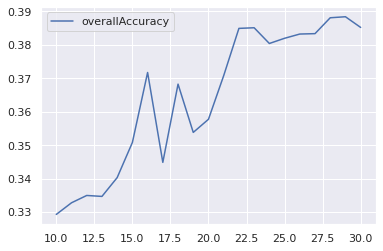

In [192]:
overallAccuracy_kMeansDF.plot()

In [193]:
accuracyByLabel_kMeans

0     0.328299
1     0.261119
2     0.360313
3     0.232400
4     0.390956
5     0.326101
6     0.303797
7     0.543507
8     0.222222
9     0.401015
10    0.294190
11    0.312387
12    0.206897
13    0.315254
14    0.340435
15    0.711728
16    0.326621
17    0.364897
18    0.234783
19    0.289100
20    0.500000
21    0.373955
22    0.323799
23    0.250000
24    0.324701
25    0.231917
26    0.572813
27    0.259229
28    0.382329
29    0.269841
dtype: float64

#### **.- Aplicación del Agrupamiento Jerárquico**

In [194]:
import fastcluster
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

Z = fastcluster.linkage_vector(X_train, method='ward', \
                               metric='euclidean')

Z_dataFrame = pd.DataFrame(data=Z,columns=['clusterOne', \
                'clusterTwo','distance','newClusterSize'])

In [195]:
Z_dataFrame[:20]

,clusterOne,clusterTwo,distance,newClusterSize
0,39786.0,39787.0,0.000000e+00,2.0
1,39788.0,42542.0,0.000000e+00,3.0
2,42538.0,42539.0,0.000000e+00,2.0
3,42540.0,42544.0,0.000000e+00,3.0
4,42541.0,42545.0,3.399350e-17,4.0
5,42543.0,42546.0,5.139334e-17,7.0
6,33251.0,33261.0,1.561313e-01,2.0
7,42512.0,42535.0,3.342654e-01,2.0
8,42219.0,42316.0,3.368231e-01,2.0
9,6112.0,21928.0,3.384368e-01,2.0


In [196]:
Z_dataFrame[42521:]

,clusterOne,clusterTwo,distance,newClusterSize
42521,85038.0,85043.0,132.715723,3969.0
42522,85051.0,85052.0,141.386569,2899.0
42523,85026.0,85027.0,146.976703,2351.0
42524,85048.0,85049.0,152.660192,5691.0
42525,85036.0,85059.0,153.512281,5956.0
42526,85033.0,85044.0,160.825959,2203.0
42527,85055.0,85061.0,163.701428,668.0
42528,85062.0,85066.0,168.199295,6897.0
42529,85054.0,85060.0,168.924039,9414.0
42530,85028.0,85064.0,185.215769,3118.0


In [197]:
from scipy.cluster.hierarchy import fcluster

distance_threshold = 100
clusters = fcluster(Z, distance_threshold, criterion='distance')
X_train_hierClustered = pd.DataFrame(data=clusters, \
    index=X_train.index,columns=['cluster'])

In [198]:
print("Number of distinct clusters: ", \
      len(X_train_hierClustered['cluster'].unique()))

Number of distinct clusters:  32


In [199]:
countByCluster_hierClust, countByLabel_hierClust, \
    countMostFreq_hierClust, accuracyDF_hierClust, \
    overallAccuracy_hierClust, accuracyByLabel_hierClust = \
    analyzeCluster(X_train_hierClustered, y_train)

print("Overall accuracy from hierarchical clustering: ", \
      overallAccuracy_hierClust)

Overall accuracy from hierarchical clustering:  0.3651685393258427


In [200]:
print("Accuracy by cluster for hierarchical clustering")
accuracyByLabel_hierClust

Accuracy by cluster for hierarchical clustering


0     0.304124
1     0.219001
2     0.228311
3     0.379722
4     0.240064
5     0.272011
6     0.314560
7     0.263930
8     0.246138
9     0.318942
10    0.302752
11    0.269772
12    0.335717
13    0.330403
14    0.346320
15    0.440141
16    0.744155
17    0.502227
18    0.294118
19    0.236111
20    0.254727
21    0.241042
22    0.317979
23    0.308771
24    0.284314
25    0.243243
26    0.500000
27    0.289157
28    0.365283
29    0.479693
30    0.393559
31    0.340875
dtype: float64

#### **.- Aplicación del Algorimo HDBSCAN**

In [201]:
import hdbscan

min_cluster_size = 20
min_samples = 20
alpha = 1.0
cluster_selection_method = 'leaf'

hdb = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, \
    min_samples=min_samples, alpha=alpha, \
    cluster_selection_method=cluster_selection_method)

X_train_hdbscanClustered = hdb.fit_predict(X_train)
X_train_hdbscanClustered = pd.DataFrame(data= \
    X_train_hdbscanClustered, index=X_train.index, \
    columns=['cluster'])

countByCluster_hdbscan, countByLabel_hdbscan, \
    countMostFreq_hdbscan, accuracyDF_hdbscan, \
    overallAccuracy_hdbscan, accuracyByLabel_hdbscan = \
    analyzeCluster(X_train_hdbscanClustered, y_train)

In [202]:
print("Overall accuracy from HDBSCAN: ", overallAccuracy_hdbscan)

Overall accuracy from HDBSCAN:  0.3246203751586667


In [203]:
print("Cluster results for HDBSCAN")
countByCluster_hdbscan

Cluster results for HDBSCAN


,cluster,clusterCount
0,-1,32708
1,7,4070
2,2,3668
3,1,1096
4,4,773
5,0,120
6,6,49
7,3,38
8,5,20


In [204]:
accuracyByLabel_hdbscan

0    0.284487
1    0.341667
2    0.414234
3    0.332061
4    0.552632
5    0.438551
6    0.400000
7    0.408163
8    0.590663
dtype: float64

# **ULTIMA LINEA**